## 1) Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy
import warnings
warnings.filterwarnings('ignore')

## 2) Data Loading

In [2]:
loan_df=pd.read_csv("loan.csv")
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan_df.shape

(39717, 111)

## 3) Handling Missing Values

### 3.1 Checking if there are null values in column

In [4]:
(100*loan_df.isnull().sum() / len(loan_df)).sort_values(ascending = False)

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

### 3.2 Dropping all null columns

In [5]:
loan_df.dropna(how='all',axis = 1 , inplace = True)

In [6]:
loan_df.shape

(39717, 57)

As we can see Number of columns were reduce quite a bit. Now lets check null values again in all columns

In [7]:
(100*loan_df.isnull().sum() / len(loan_df)).sort_values(ascending = False)[:20]

next_pymnt_d                  97.129693
mths_since_last_record        92.985372
mths_since_last_delinq        64.662487
desc                          32.585543
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
home_ownership                 0.000000
int_rate                       0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
total_rec_prncp                0.000000
dtype: float64

Dropping all columns which has more than 40% of null values : 
**( next_pymnt_d, mths_since_last_record, mths_since_last_delinq )**

Dropping **emp_title**, **desc**, **title** as these are **nouns** or **descriptive text** which  won't help in analysis 

In [8]:
#No of Rows
loan_df.shape[0]

39717

In [9]:
loan_df.member_id.head().values

array([1296599, 1314167, 1313524, 1277178, 1311748], dtype=int64)

In [10]:
len(loan_df.member_id.unique())

39717

In [11]:
loan_df.url.head().values

array(['https://lendingclub.com/browse/loanDetail.action?loan_id=1077501',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=1077430',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=1077175',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=1076863',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=1075358'],
      dtype=object)

In [12]:
len(loan_df.url.unique())

39717

As you can see id, member_id and url is are unique in nature because they are matching with count of whole dataset so lets drop these three columns

In [13]:
loan_df.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [14]:
loan_df.tax_liens.unique()

array([ 0., nan])

In [15]:
loan_df.chargeoff_within_12_mths.unique()

array([ 0., nan])

As you can see collections_12_mths_ex_med, tax_liens, chargeoff_within_12_mths have only zero and Nan values we can drop these things

In [16]:
col=[]

In [17]:
drop_col_list = ['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'desc', 'title','emp_title','member_id','url',
                 'collections_12_mths_ex_med','tax_liens','chargeoff_within_12_mths']
loan_df = loan_df.drop(drop_col_list, axis=1)
loan_df.shape

(39717, 46)

In [18]:
(100*loan_df.isnull().sum() / len(loan_df)).sort_values(ascending = False)[:10]

emp_length              2.706650
pub_rec_bankruptcies    1.754916
last_pymnt_d            0.178765
revol_util              0.125891
last_credit_pull_d      0.005036
total_rec_int           0.000000
total_acc               0.000000
initial_list_status     0.000000
out_prncp               0.000000
out_prncp_inv           0.000000
dtype: float64

### 3.3 Dropping Rows

The rows where loan_stats=Current are the data where the loan repayment is currently in progress\
The loans which are currently in progress will not contribute to decisions

In [19]:
loan_df = loan_df[loan_df['loan_status'] != "Current"]

In [20]:
loan_df.shape

(38577, 46)

In [21]:
(100*loan_df.isnull().sum() / len(loan_df)).sort_values(ascending = False)[:10]

emp_length              2.677761
pub_rec_bankruptcies    1.806776
last_pymnt_d            0.184047
revol_util              0.129611
last_credit_pull_d      0.005184
total_rec_int           0.000000
total_acc               0.000000
initial_list_status     0.000000
out_prncp               0.000000
out_prncp_inv           0.000000
dtype: float64

In [22]:
# Dropping all columns with all zero values
loan_df = loan_df.loc[:, (loan_df != 0).any(axis=0)]

In [23]:
loan_df.shape

(38577, 42)

In [24]:
total = 0
for col in loan_df.columns[loan_df.isna().any()].tolist():
    val = len(loan_df[loan_df[col].isna()]) / len(loan_df) * 100
    total += val
    print(col, round(val, 2),"%")
print("\nTotal rows percentage whose columns are blank : ", round(total ,2), "%")

emp_length 2.68 %
revol_util 0.13 %
last_pymnt_d 0.18 %
last_credit_pull_d 0.01 %
pub_rec_bankruptcies 1.81 %

Total rows percentage whose columns are blank :  4.8 %


As we can see only 4.8 % data in is missing so we can drop it 

In [25]:
cols_to_drop_some_rows=['emp_length','revol_util','last_pymnt_d','last_credit_pull_d','pub_rec_bankruptcies']
for col in cols_to_drop_some_rows:
    loan_df=loan_df[loan_df[col].notna()]
loan_df.shape

(36737, 42)

In [26]:
(100*loan_df.isnull().sum() / len(loan_df)).sort_values(ascending = False)[:10]

id                     0.0
total_rec_prncp        0.0
open_acc               0.0
pub_rec                0.0
revol_bal              0.0
revol_util             0.0
total_acc              0.0
initial_list_status    0.0
total_pymnt            0.0
total_pymnt_inv        0.0
dtype: float64

Now we can see that all our missing data is gone

## 4) Data Cleaning and conversion

In [27]:
loan_df.dtypes

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
initial_list_status 

In [28]:
# Convert the columns loan_amnt and funded_amnt as flot64
loan_df = loan_df.astype({'loan_amnt':'float','funded_amnt':'float'})

In [29]:
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0.0
1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0.0
2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0.0
3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0.0
5,1075269,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,3 years,...,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0.0


In [30]:
# Convert the term column into an integer from a string
loan_df['term'] = loan_df['term'].apply(lambda x : int(x[:-7]))
loan_df['term']

0        36
1        60
2        36
3        36
5        36
         ..
39562    36
39573    36
39623    36
39666    36
39680    36
Name: term, Length: 36737, dtype: int64

In [31]:
# Converting the column issue_d from string object to DateTime
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')
loan_df.issue_d.head(5)

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [32]:
# Convert int_rate to  float by removing the "%" character
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x : float(x[:-1]))
print(loan_df.int_rate)

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39562    10.28
39573    10.59
39623    12.49
39666    11.22
39680    11.86
Name: int_rate, Length: 36737, dtype: float64


In [33]:
loan_df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [34]:
# Converting emp_length to integer values
# Converting emp_length as numerical data to create more effective statistical analysis as compared to nominal values
loan_df['emp_length'] = loan_df['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3, 
                                                         '7 years': 7, '4 years': 4, '5 years': 5, 
                                                         '1 year': 1, '6 years': 6, '8 years': 8, 
                                                         '9 years': 9,  '10+ years': 10})

loan_df['emp_length'].unique()

array([10,  0,  3,  8,  9,  4,  5,  1,  6,  2,  7], dtype=int64)

## 5) Derived Columns

In [35]:
# Adding additional column for Year and Month for analysis extrating Year and Month from issue_d
loan_df['issued_year'] = loan_df['issue_d'].dt.year
loan_df['issued_month'] = loan_df['issue_d'].dt.month

print(loan_df['issued_year'].unique())
print()
print(loan_df['issued_month'].unique())

[2011 2010 2009 2008 2007]

[12 11 10  9  8  7  6  5  4  3  2  1]


In [36]:
# Bucketting Months to quarters
def bucket_issued_month(column):
    if column < 4:
        return 'Q1' 
    elif (column >= 4) and (column < 7):
        return 'Q2'      
    elif (column >= 7) and (column < 9):
        return 'Q3'  
    else:
        return 'Q4' # 75% quartile
    
loan_df['issued_quarter'] = loan_df.apply(lambda x : bucket_issued_month(x['issued_month']), axis = 1)
print(loan_df['issued_quarter'].unique())

['Q4' 'Q3' 'Q2' 'Q1']


In [37]:
loan_df['loan_amnt'].describe()

count    36737.000000
mean     11153.348123
std       7368.338940
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [38]:
# Bucketting Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'      
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'  
    else:
        return '15K - above' # 75% quartile
    
loan_df['loan_amnt_bin'] = loan_df.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)
print(loan_df.loan_amnt_bin.unique())

['0 - 5K' '5K - 10K' '10K - 15K' '15K - above']


In [39]:
loan_df['funded_amnt_inv'].describe()

count    36737.000000
mean     10444.162699
std       7008.217311
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14351.550250
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [40]:
# Bucketting Funded Amount
def bucket_funded_amnt_inv(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'      
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'  
    else:
        return '15K - above' # 75% quartile
    
loan_df['funded_amnt_inv_bin'] = loan_df.apply(lambda x : bucket_funded_amnt_inv(x['funded_amnt_inv']), axis = 1)
print(loan_df.funded_amnt_inv_bin.unique())

['0 - 5K' '5K - 10K' '10K - 15K' '15K - above']


In [41]:
loan_df['funded_amnt'].describe()

count    36737.000000
mean     10884.141329
std       7107.265274
min        500.000000
25%       5425.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [42]:
# Bucketting Funded Amount
def bucket_funded_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'      
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'  
    else:
        return '15K - above' # 75% quartile
    
loan_df['funded_amnt_bin'] = loan_df.apply(lambda x : bucket_funded_amnt(x['funded_amnt']), axis = 1)
print(loan_df.funded_amnt_bin.unique())

['0 - 5K' '5K - 10K' '10K - 15K' '15K - above']


In [43]:
loan_df['annual_inc'].describe()/1000

count      36.737000
mean       69.467232
std        64.062562
min         4.000000
25%        41.200000
50%        60.000000
75%        83.000000
max      6000.000000
Name: annual_inc, dtype: float64

In [44]:
# Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'    
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan_df['annual_inc_bin'] = loan_df.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)
print(loan_df.annual_inc_bin.unique())

['0 - 40k' '40k - 50k' '70k to 80k' '80k - above' '50k to 60k'
 '60k to 70k']


In [45]:
loan_df['int_rate'].unique()[:5]

array([10.65, 15.27, 15.96, 13.49,  7.9 ])

In [46]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'    
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile
    
loan_df['int_rate_bin'] = loan_df.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)
print(loan_df.int_rate_bin.unique())

['Low' 'Very High' 'High' 'Very Low' 'Moderate']


In [47]:
loan_df['dti'].describe()

count    36737.000000
mean        13.336909
std          6.649464
min          0.000000
25%          8.220000
50%         13.430000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

In [48]:
# Bucketing dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'    
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile
    
loan_df['dti_bin'] = loan_df.apply(lambda x : bucket_dti(x.dti), axis = 1)
print(loan_df.dti_bin.unique())

['Very High' 'Very Low' 'Low' 'High' 'Moderate']


In [49]:
derived_cols=[
    {
        "col_1":"loan_amnt",
        "col_2":"loan_amnt_bin"
    },
    {
        "col_1":"funded_amnt_inv",
        "col_2":"funded_amnt_inv_bin"
    },
    {
        "col_1":"funded_amnt",
        "col_2":"funded_amnt_bin"
    },
    {
        "col_1":"int_rate",
        "col_2":"int_rate_bin"
    },
    {
        "col_1":"dti",
        "col_2":"dti_bin"
    }
]


In [50]:
def validate_derived_cols(df,col_1,col_2):
    # Validating Categories
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[col_1],x=df[col_2])
    plt.show()

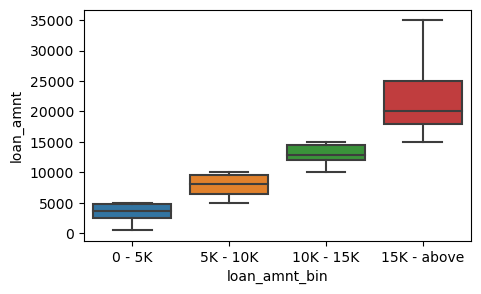

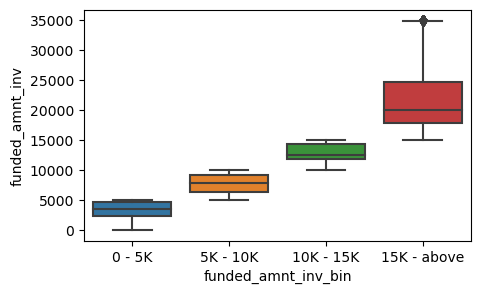

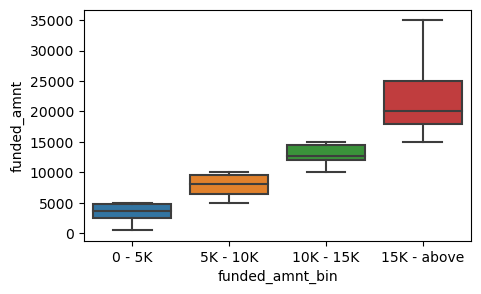

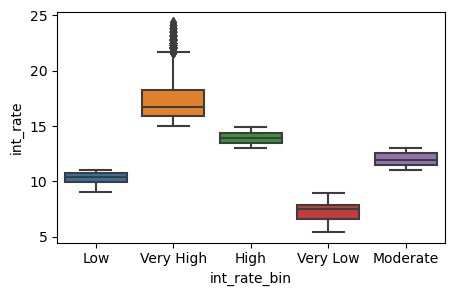

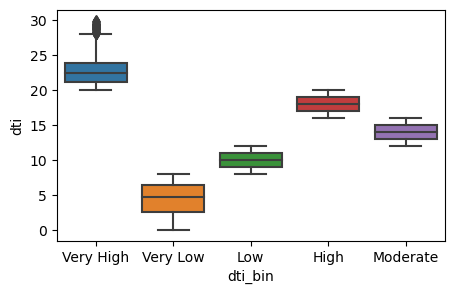

In [51]:
for col in derived_cols:
    validate_derived_cols(loan_df,col["col_1"],col["col_2"])

In [52]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'pub_rec_bankruptcies', 'issued_year',
       'issued_month', 'issued_quarter', 'loan_amnt_bin',
       'funded_amnt_inv_bin', 'funded_amnt_bin', 'annual_inc_bin',
       'int_rate_bin', 'dti_bin'],
      dtype='object')

These columns have only one value in entire column 'sub_grade','pymnt_plan','initial_list_status','policy_code','application_type'

In [53]:
duplcate_values_in_cols = ['sub_grade','pymnt_plan','initial_list_status','policy_code','application_type']
irrelevent_cols = ['last_credit_pull_d' ,'last_pymnt_d','last_pymnt_amnt','inq_last_6mths','open_acc',
'total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
'recoveries','collection_recovery_fee','earliest_cr_line','pub_rec','revol_bal','revol_util'
]
for col in duplcate_values_in_cols:
    print(f"{col} : ",loan_df[col].unique())
    print()

sub_grade :  ['B2' 'C4' 'C5' 'C1' 'A4' 'E1' 'F2' 'B5' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'C2' 'D4' 'F3' 'E3' 'F1' 'E5' 'G4'
 'E2' 'G2' 'G1' 'F5' 'F4' 'G5' 'G3']

pymnt_plan :  ['n']

initial_list_status :  ['f']

policy_code :  [1]

application_type :  ['INDIVIDUAL']



In [54]:
loan_df=loan_df.drop(duplcate_values_in_cols+irrelevent_cols,axis=1)
loan_df.columns.size

29

In [55]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'pub_rec_bankruptcies',
       'issued_year', 'issued_month', 'issued_quarter', 'loan_amnt_bin',
       'funded_amnt_inv_bin', 'funded_amnt_bin', 'annual_inc_bin',
       'int_rate_bin', 'dti_bin'],
      dtype='object')

Common Functions

In [56]:
# Formulae used in this analysis
# IQR = 75th Quartile - 25th Quartile
# Lower Bound = 25th Quartile - 1.5 * IQR
# Upper Bound = 75th Quartile + 1.5 * IQR

iqr_multiplier = 1.5

def get_iqr(df, column):
    quar25 = df[column].quantile(0.25)
    quar75 = df[column].quantile(0.75)
    iqr = quar75 - quar25
    lower = quar25 - iqr_multiplier * iqr
    upper = quar75 + iqr_multiplier * iqr
    return {'quartile1': quar25, 'quartile3': quar75, 'iqr': iqr, 'lower_bound': lower, 'upper_bound': upper}



# Plot 1 = Before outlier treatment
# Plot 2 = Post outlier treatment
# Also prints statistics of rows dropped
def outlier_comparison(df, column):
    # box plot before dropping outliers
    fig, p = plt.subplots(1,2,figsize=(14, 3))
    splot1 = sns.boxplot(df[column], ax=p[0], orient="h")
    splot1.set_title('Plot ['+ column + '] - Original')
    new_df = df[df[column] < get_iqr(df, column)['upper_bound']]
    # box plot after dropping outliers    
    splot2 = sns.boxplot(new_df[column], ax=p[1])
    splot2.set_title('Plot [' + column + '] - Post Outlier Treatment')
    plt.tight_layout()
    plt.show()
    
def drop_outlier(df, column):
    old_rows = len(df)
    new_df = df[df[column] < get_iqr(df, column)['upper_bound']]
    new_rows = len(new_df)
    print('Rows dropped: ', old_rows - new_rows)
    print('Percentage rows dropped: ', round((old_rows - new_rows)/old_rows*100,2), "%")
    return new_df

In [57]:
def univariate_analysis(df, column):
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sns.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column)
    p[1].set_xlabel(column)
    plt.tight_layout()
    plt.show()

In [58]:
def ratio_wise(df, column):
    rw = df.pivot_table(index=column, columns='loan_status', values='id', aggfunc=len).reset_index()
    rw['total'] = rw['Charged Off'] + rw['Fully Paid']
    rw['charge_off_ratio'] = round(rw['Charged Off'] / rw['total'] * 100)
    rw.sort_values(by='total', ascending=False)
    return rw

def ratio_wise_plot(df, column, invert=False):
    plt.figure(figsize=[20,8])
    plt.title('Charged Off : ' + column)
    rw = ratio_wise(df, column)
    if invert:
        sns.barplot(x=rw['charge_off_ratio'].values, y=rw[column].values)
    else:
        sns.barplot(x=rw[column].values, y=rw['charge_off_ratio'].values)
    plt.tight_layout()
    plt.show()

def series_plot(df, column, hue=None, annot=1,orient='h'):
        temp = pd.Series()
        fig, ax = plt.subplots(figsize=(20,14))
        width = len(df[column].unique()) + 6 + 4 * len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x=column, order=df[column].value_counts().index, hue=hue,orient=orient) 
        if annot == 1:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))  
        elif annot == 2:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
        plt.show()
        
def plot_box(df,column_x,column_y):
    plt.figure(figsize=(16,6))
    sns.boxplot(y=df[column_y],x=df[column_x])
    plt.show()

## 6) Univariate Analysis

### 6.1 Outlier removal on features

In [59]:
loan_df.shape

(36737, 29)

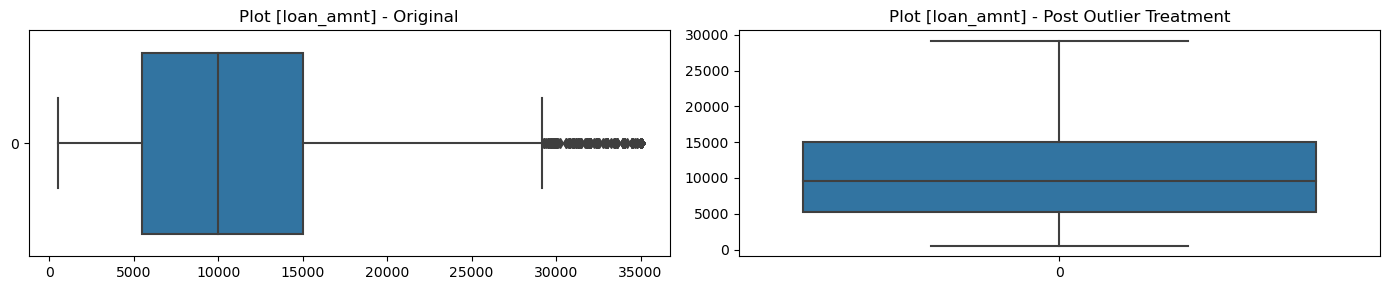

Rows dropped:  1076
Percentage rows dropped:  2.93 %


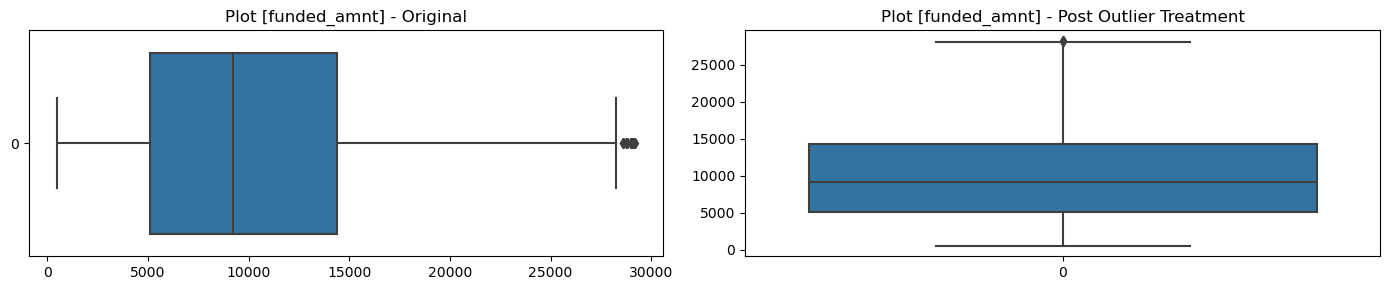

Rows dropped:  30
Percentage rows dropped:  0.08 %


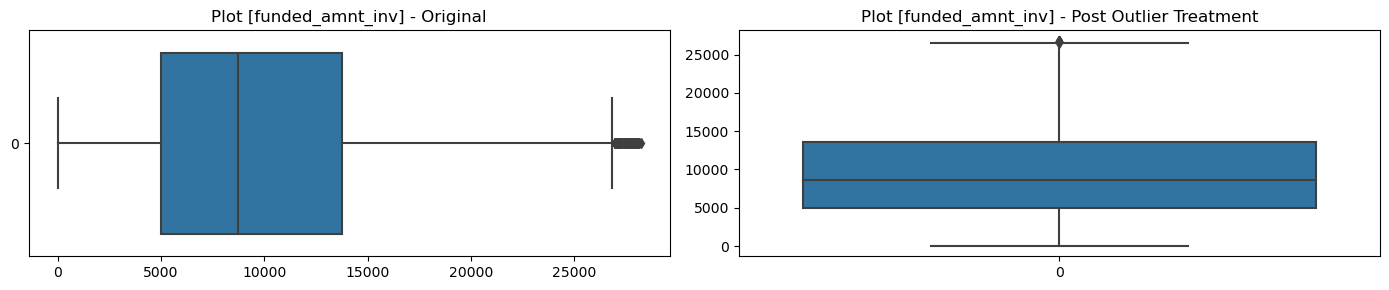

Rows dropped:  152
Percentage rows dropped:  0.43 %


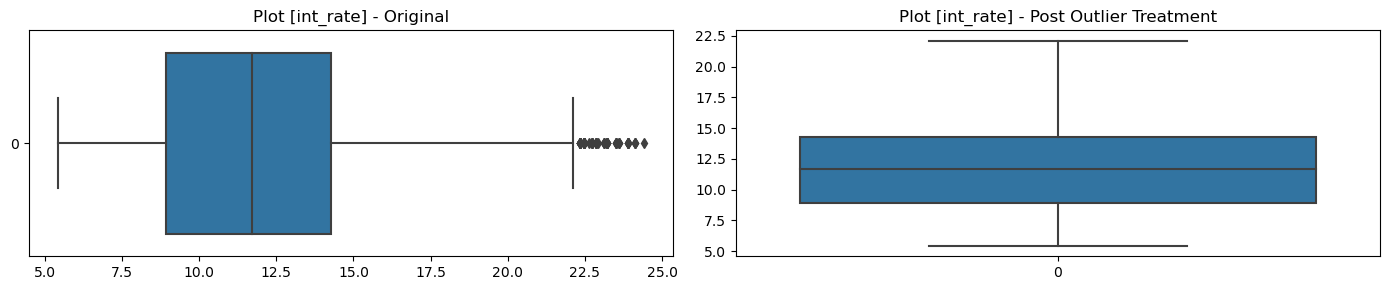

Rows dropped:  63
Percentage rows dropped:  0.18 %


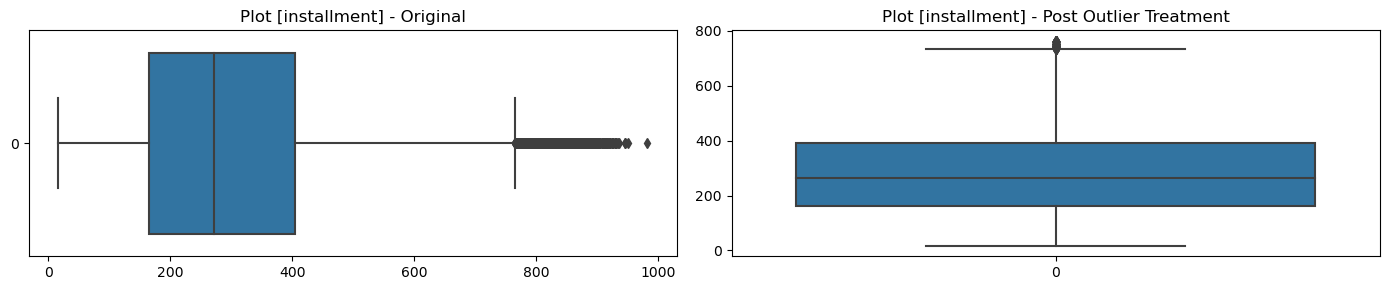

Rows dropped:  978
Percentage rows dropped:  2.76 %


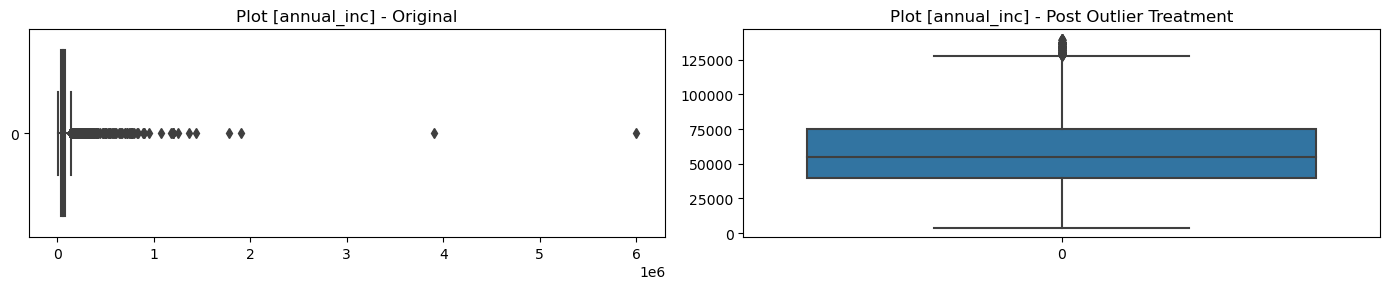

Rows dropped:  1483
Percentage rows dropped:  4.31 %


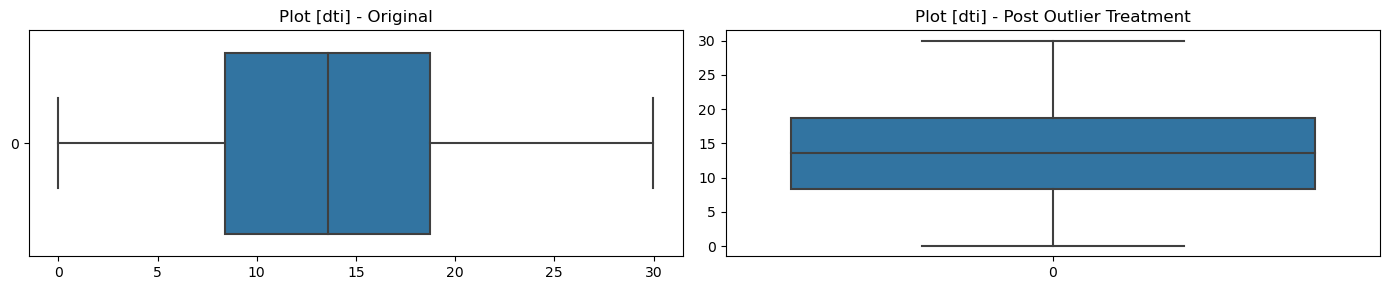

Rows dropped:  0
Percentage rows dropped:  0.0 %


In [60]:
original_row_count = len(loan_df)

outlier_treatment = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti']
for column in outlier_treatment:
    outlier_comparison(loan_df, column)
    loan_df = drop_outlier(loan_df, column)

In [61]:
loan_df.shape

(32955, 29)

### 6.2 Quantitative Variable Analysis

In [62]:
uni_cols=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti']

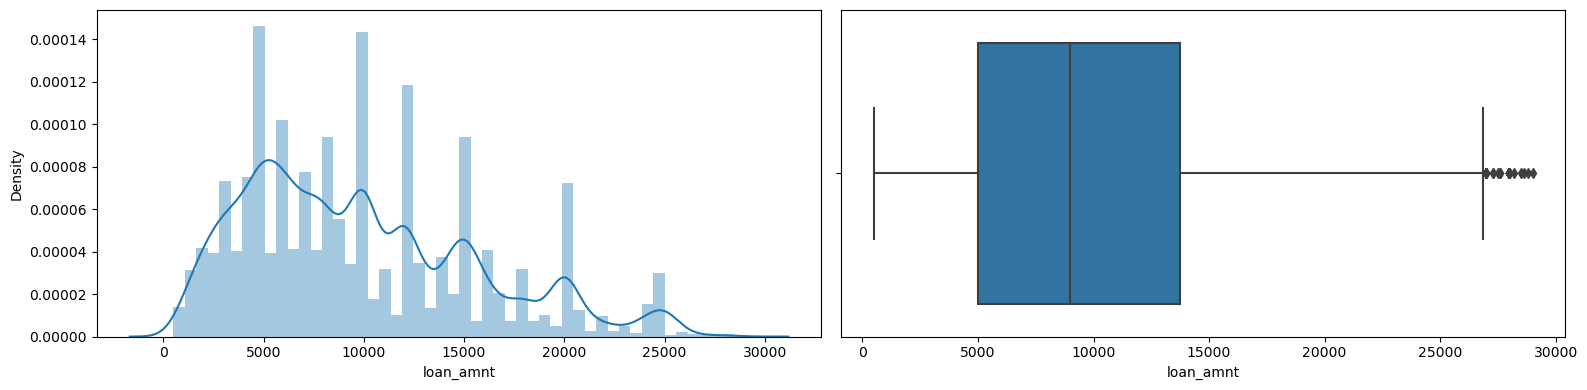

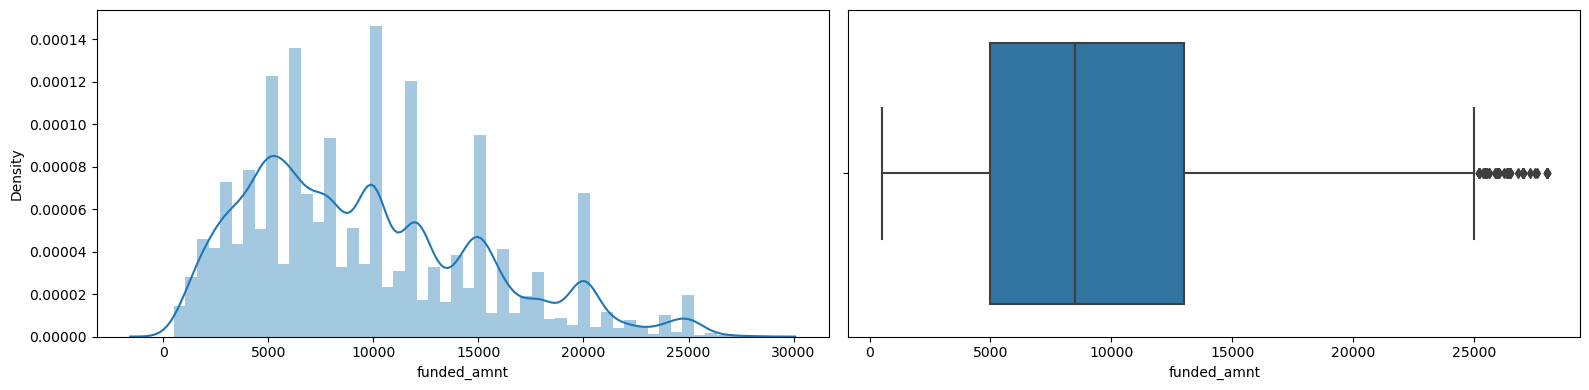

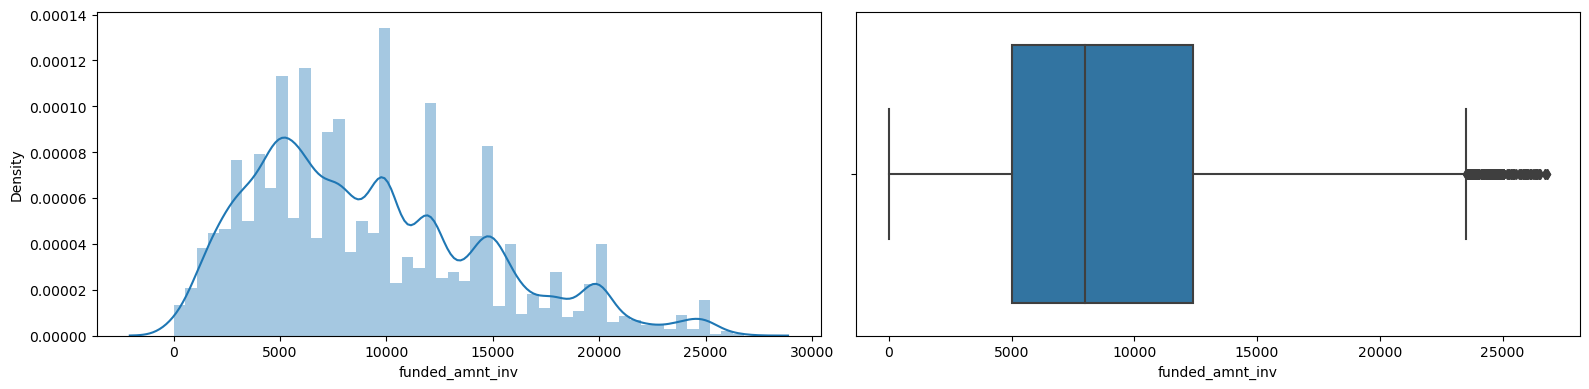

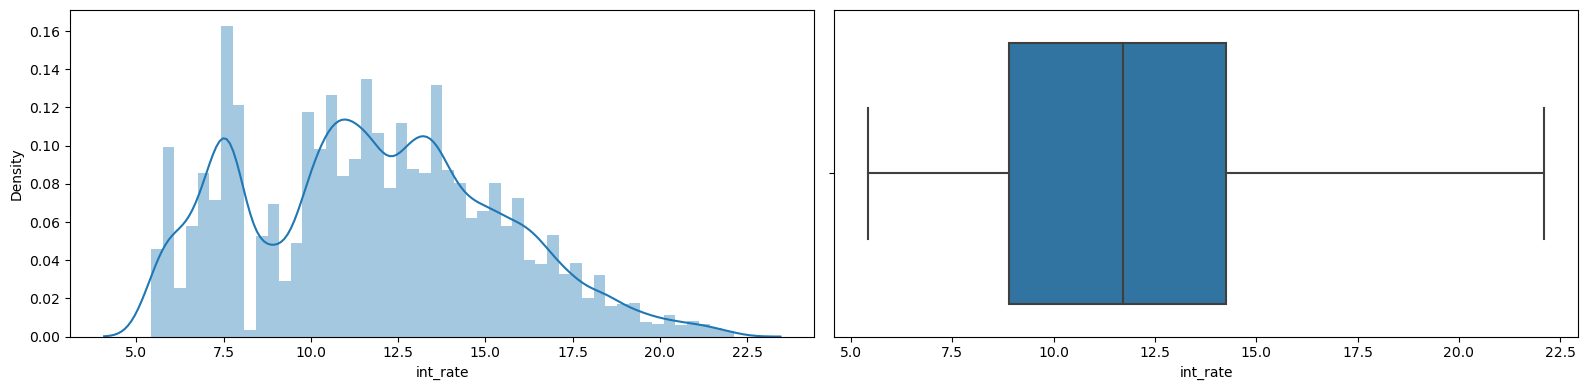

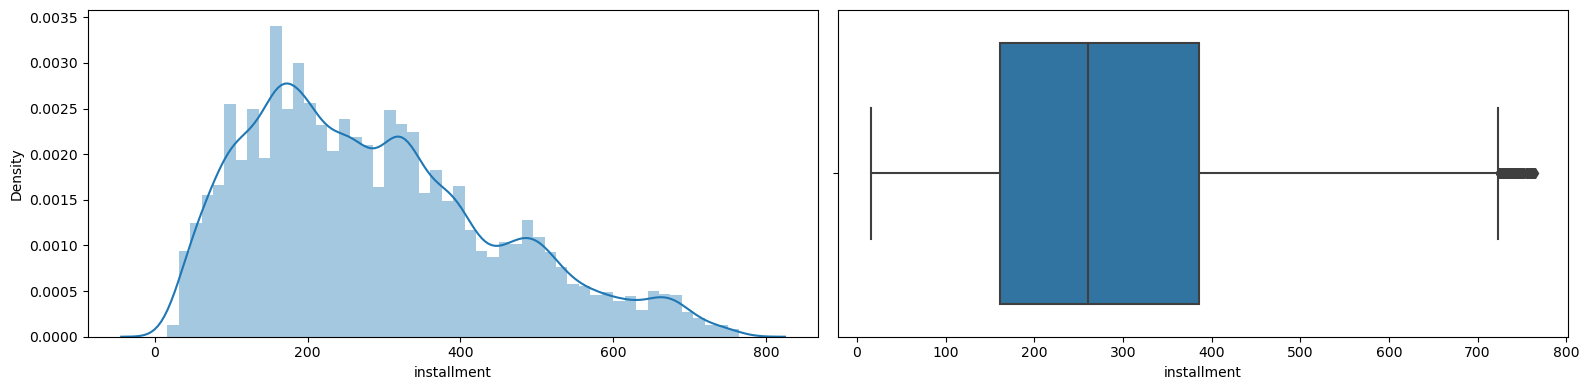

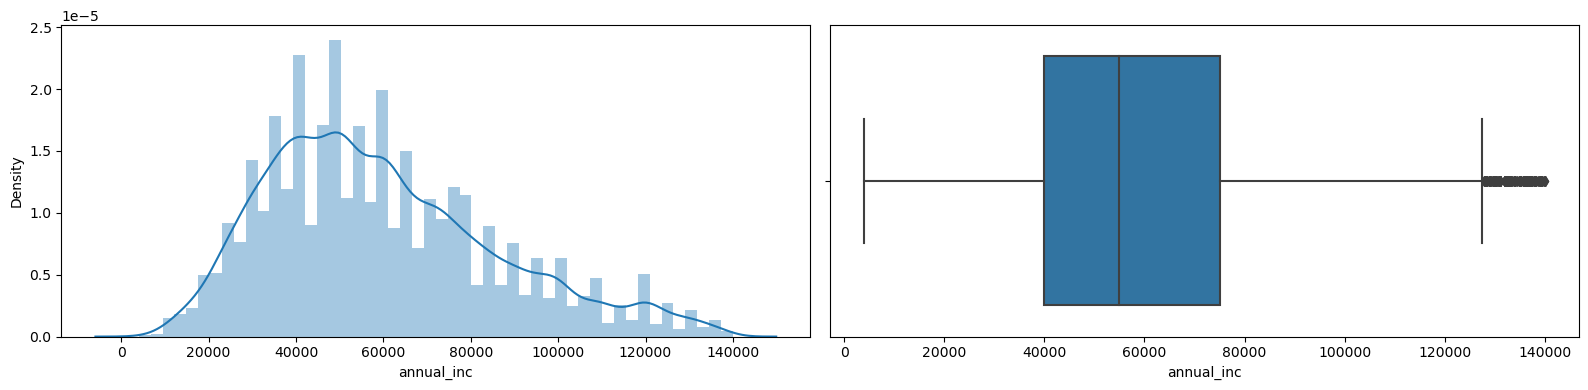

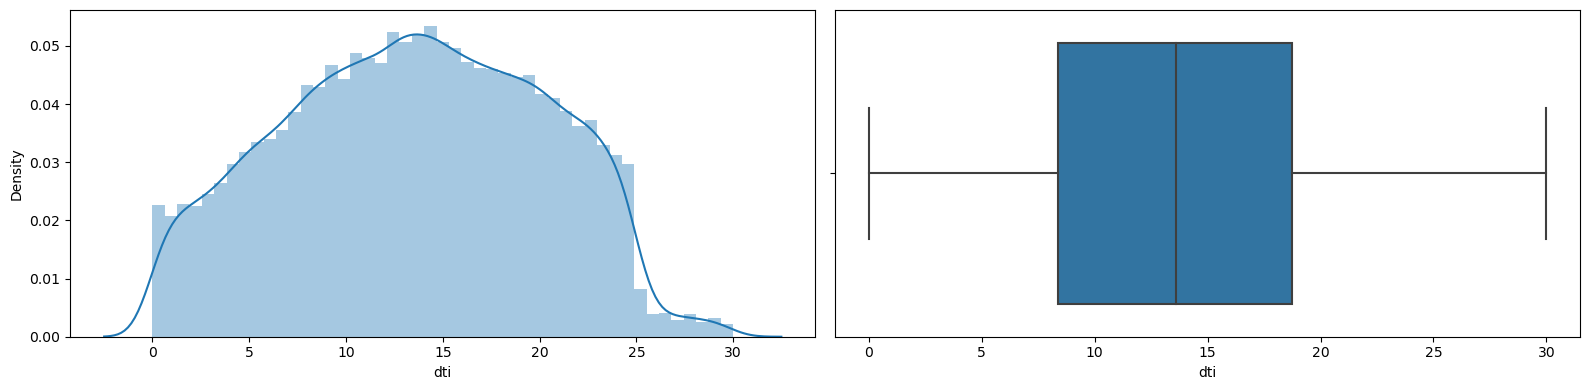

In [63]:
for col in uni_cols:
    univariate_analysis(loan_df, col)

__Summary__ :

Most of the loan amount is in the range of 5000 to 14000\
Majority of the funded amount is in the range of 5000 to 13000\
Majority of the funded amnt_inv is in the range of 5000 to 12000\
Majority of the interest rate is in the range of 5% to 16% going at the max to 22%\
Majority of the installment is in the range of 20 to 400 going at the max to 700\
Majority of the annual income is in the range of 4000 to 40000 going at the max to 12000. This column required major outlier treatment.\
Majority of the debt to income is in the range of 0 to 20 going at the max to 30

### 6.3 Ordered Categorical Variable Analysis

In [64]:
ordered_var_cols=['term','grade','emp_length','pub_rec_bankruptcies']

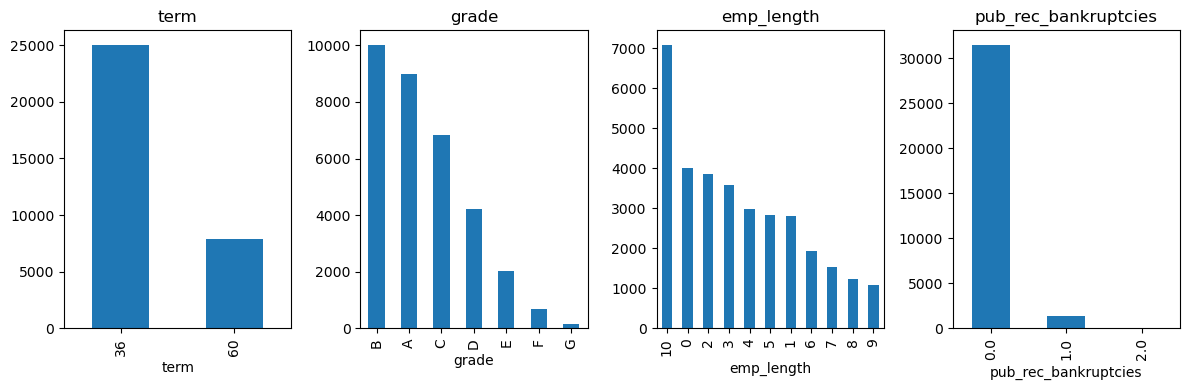

In [65]:
# Create a subplot with the desired number of rows and columns
num_cols = len(ordered_var_cols)
num_rows = 1  # Change this based on your layout preference
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4))  # Adjust the figsize as needed

# Iterate through ordered_var_cols and create bar plots
for i, col in enumerate(ordered_var_cols):
    loan_df[col].value_counts().plot.bar(ax=axes[i])
    axes[i].set_title(col)  # Set the title for each subplot

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

**Summary** : 

Majority of the loan applications counts are in the term of 36 months.\
Majority of loan application counts fall under the catogory of Grade B.\
Majority of the employment length of the customers are 10+ years and then in the range of 0-2 years.\
Majority of the loan applicants are in the category of not having an public record of bankruptcies.

### 6.4 Unordered Categorical Variable Analysis

In [66]:
unordered_var_cols=['home_ownership','purpose','addr_state']

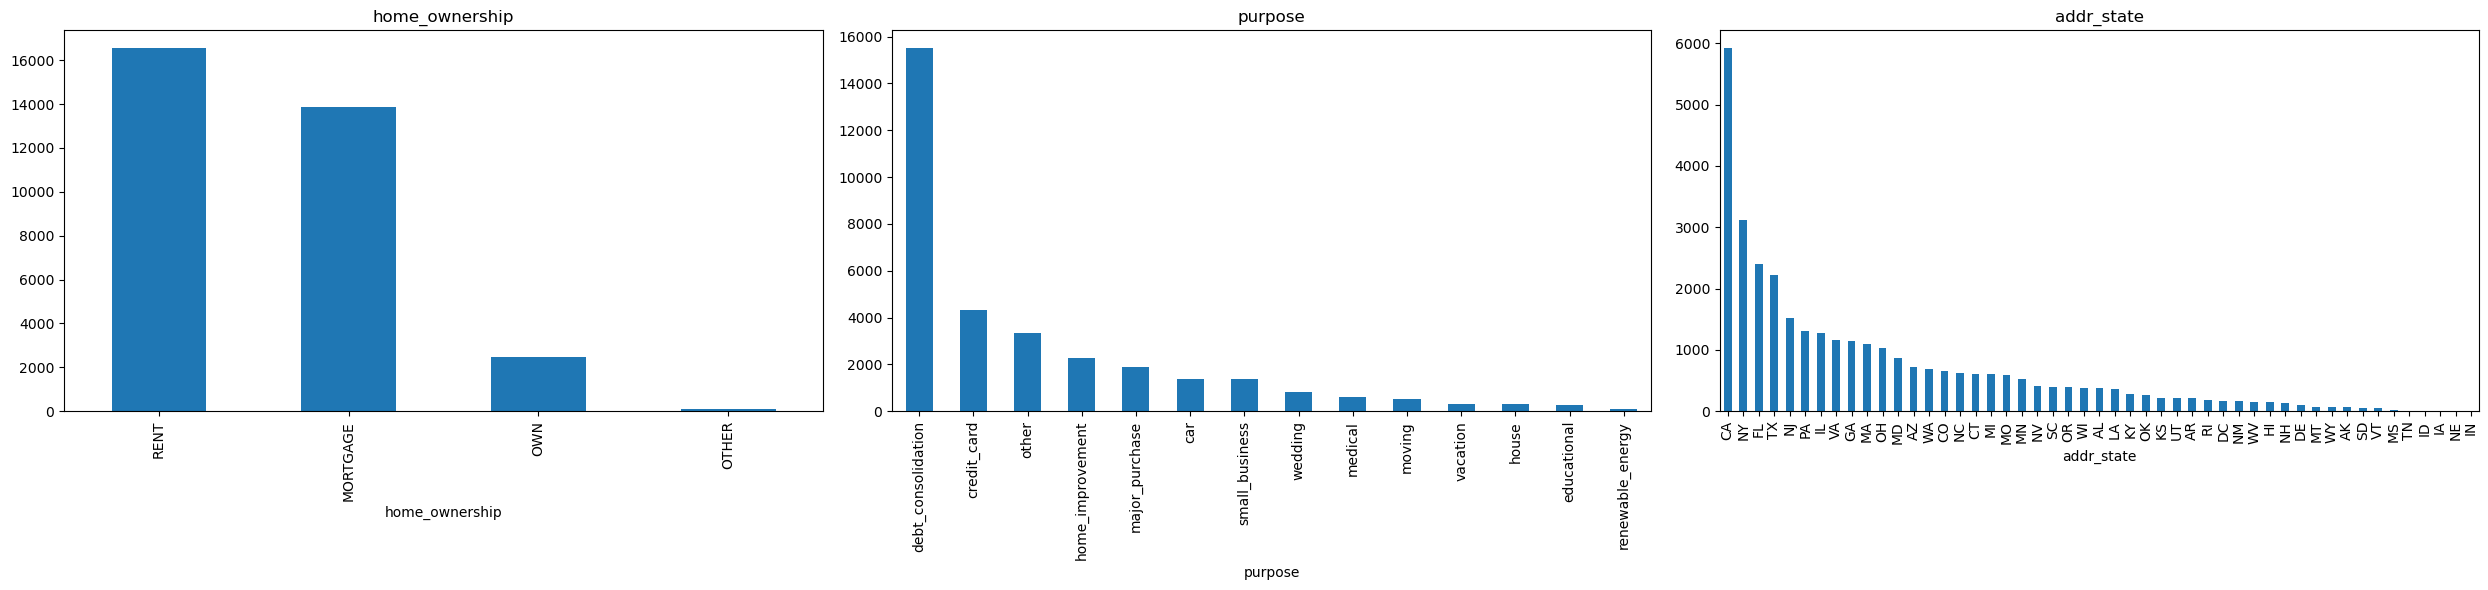

In [67]:
# Create a subplot with the desired number of rows and columns
num_cols = len(unordered_var_cols)
num_rows = 1  # Change this based on your layout preference
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 6))  # Adjust the figsize as needed

# Iterate through ordered_var_cols and create bar plots
for i, col in enumerate(unordered_var_cols):
    loan_df[col].value_counts().plot.bar(ax=axes[i])
    axes[i].set_title(col)  # Set the title for each subplot

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

__Summary__ :

Majority of the home owner status are in status of RENT and MORTGAGE.\
Majority of loan application are in the category of debt_consolidation.\
CA state has the maximum amount of loan applications.

### 6.5 Derivied Variable Analysis

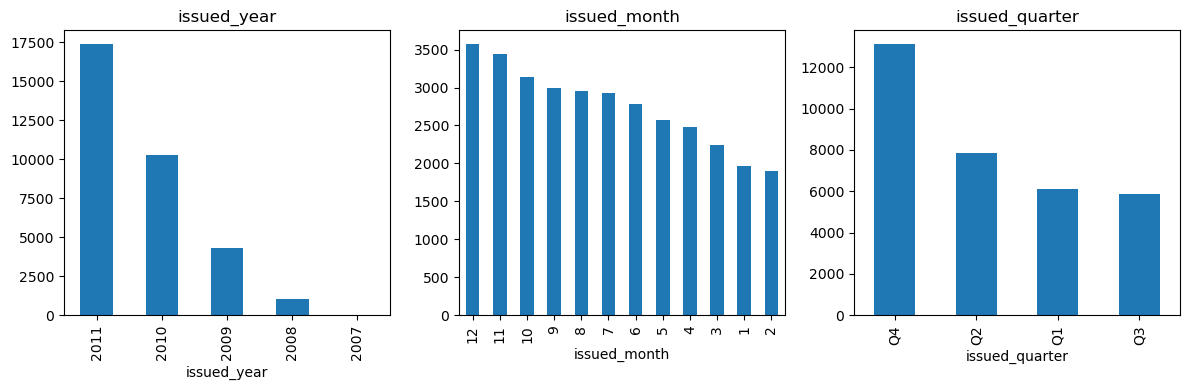

In [68]:
derived_datetime_var_cols = ['issued_year', 'issued_month', 'issued_quarter'] 
# derived_loan_var_cols = ['loan_amnt_bin', 'funded_amnt_bin', 'funded_amnt_inv_bin']
# derived_factors_var_cols = ['annual_inc_bin', 'int_rate_bin', 'dti_bin']

num_cols = len(derived_datetime_var_cols)
num_rows = 1  # Change this based on your layout preference
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4))  # Adjust the figsize as needed

# Iterate through ordered_var_cols and create bar plots
for i, col in enumerate(derived_datetime_var_cols):
    loan_df[col].value_counts().plot.bar(ax=axes[i])
    axes[i].set_title(col)  # Set the title for each subplot

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

__Summary__ :

Loan application counts are increasing year over year. Maybe the risk exposure is increasing over the year (un proven hypothesis)\
The lowest loans applocation count are in the month of Jan, Feb, March and highest counts are in Oct, Nov, Dec.\
Highest loan application volume in Quarter 4 of a year

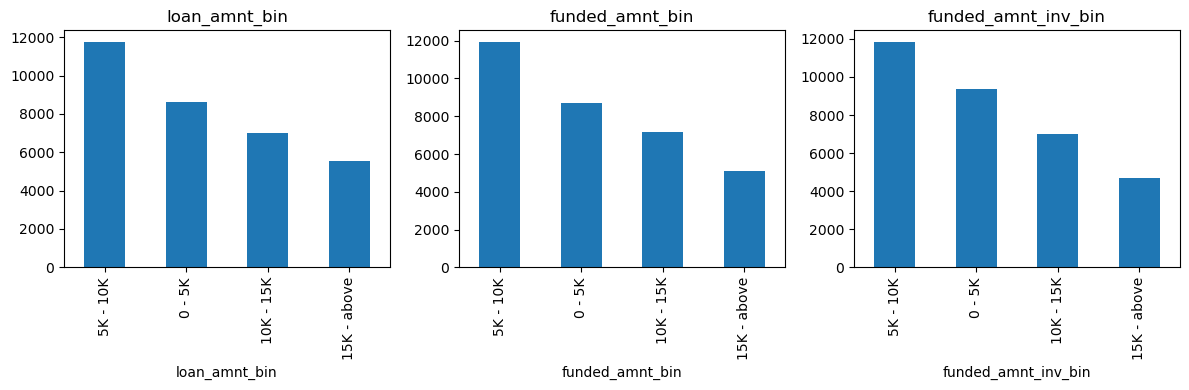

In [69]:
# derived_datetime_var_cols = ['issued_year', 'issued_month', 'issued_quarter'] 
derived_loan_var_cols = ['loan_amnt_bin', 'funded_amnt_bin', 'funded_amnt_inv_bin']
# derived_factors_var_cols = ['annual_inc_bin', 'int_rate_bin', 'dti_bin']

num_cols = len(derived_loan_var_cols)
num_rows = 1  # Change this based on your layout preference
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4))  # Adjust the figsize as needed

# Iterate through ordered_var_cols and create bar plots
for i, col in enumerate(derived_loan_var_cols):
    loan_df[col].value_counts().plot.bar(ax=axes[i])
    axes[i].set_title(col)  # Set the title for each subplot

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

__Summary__ :

Highest loan amount applications fall in the range of 5k to 10k.\
Highest funded amount applications fall in the range of 5k to 10k\
Highest loan amount applications fall in the range of 5k to 10k

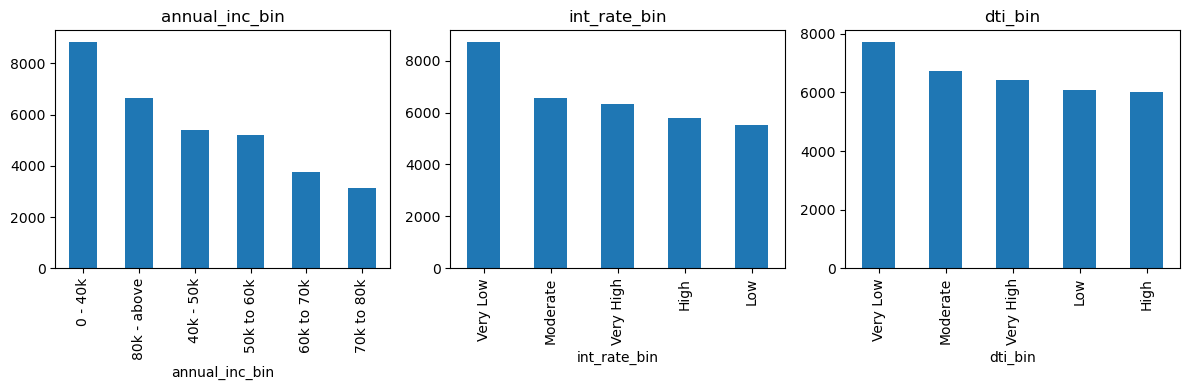

In [70]:
# derived_datetime_var_cols = ['issued_year', 'issued_month', 'issued_quarter'] 
# derived_loan_var_cols = ['loan_amnt_bin', 'funded_amnt_bin', 'funded_amnt_inv_bin']
derived_factors_var_cols = ['annual_inc_bin', 'int_rate_bin', 'dti_bin']

num_cols = len(derived_factors_var_cols)
num_rows = 1  # Change this based on your layout preference
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4))  # Adjust the figsize as needed

# Iterate through ordered_var_cols and create bar plots
for i, col in enumerate(derived_factors_var_cols):
    loan_df[col].value_counts().plot.bar(ax=axes[i])
    axes[i].set_title(col)  # Set the title for each subplot

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

__Summary__ :

Majority of the loan applocants are in the range of 0 - 40K anual income\
Majority of the loan applocations are in the category of Very Low interest rates\
Majority of the loan applications are in Moderate debt to income ratio

## 7) Bivariate Analysis

Identify causes and data which contribute to more Charge Off's

Analysis of term vs loan_status

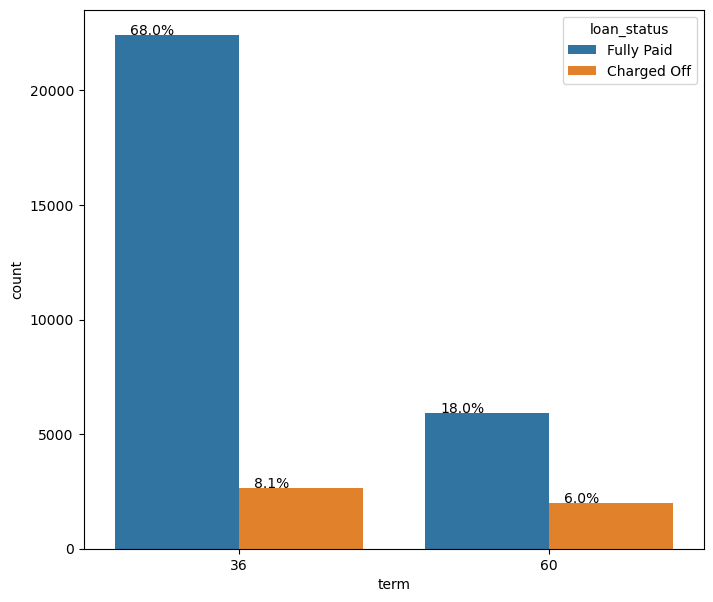

In [71]:
series_plot(loan_df, 'term', 'loan_status')

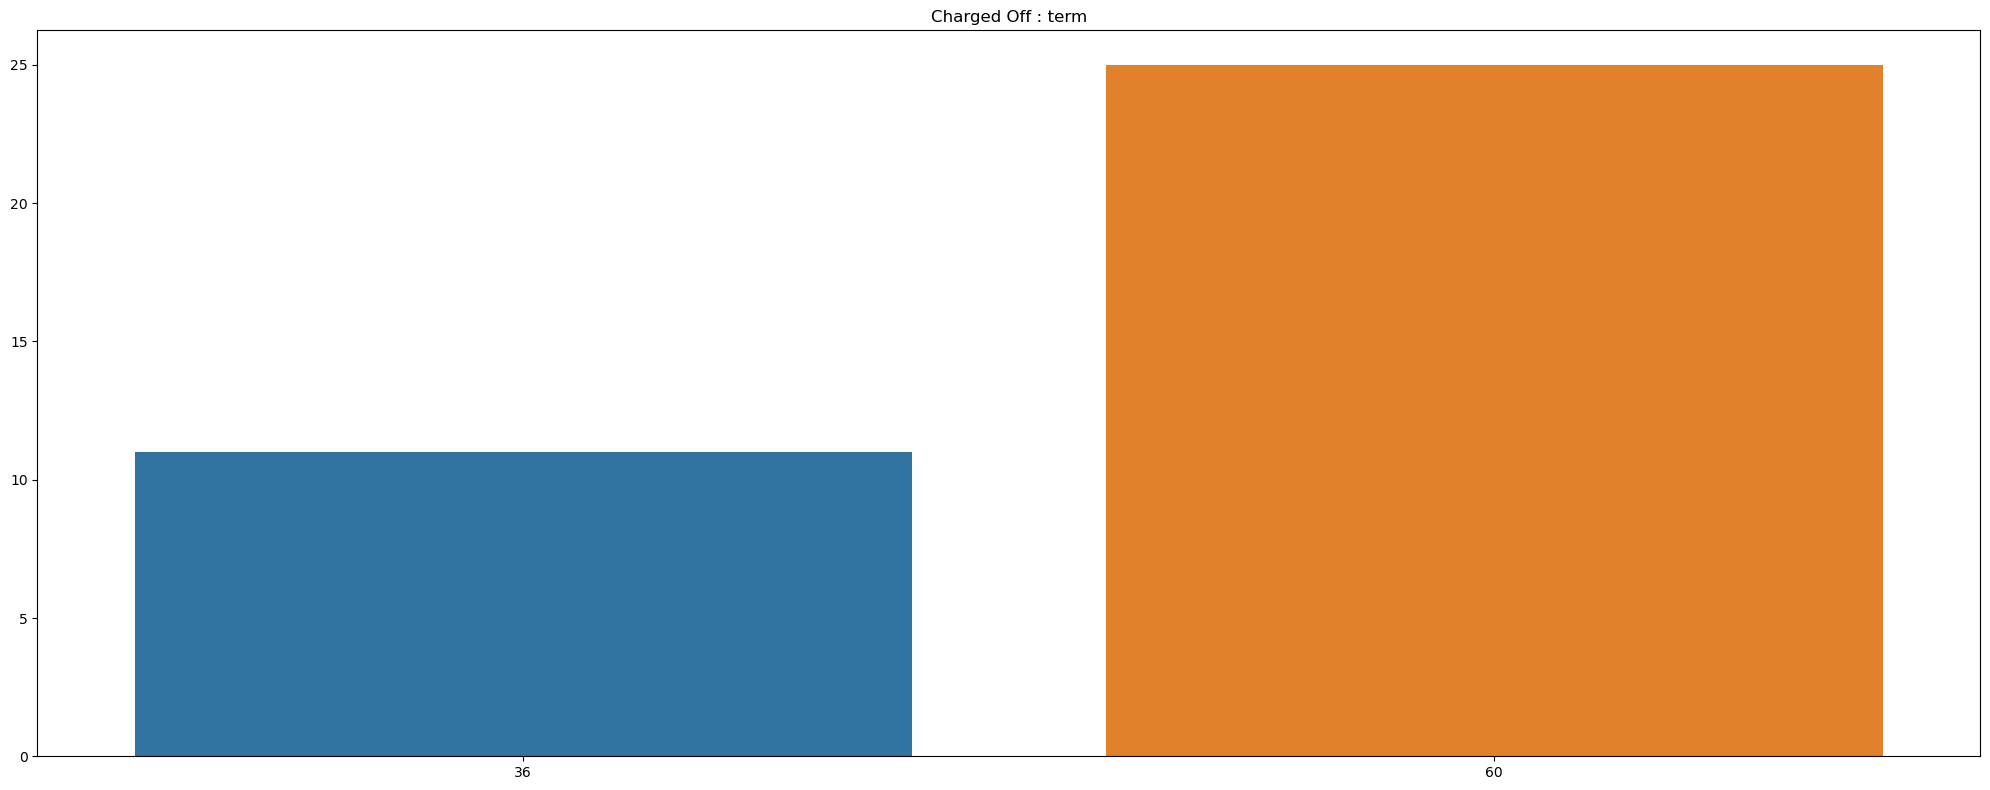

In [72]:
ratio_wise_plot(loan_df, 'term')

**Summary :**

The analysis reveals that loan volume is higher in the term=36 category. Although the overall charge-off percentage is slightly higher in term=36 (8%) compared to term=60 (6%), the ratio of charge-offs within the term=60 category is significantly higher (25% vs. 10%). This suggests that term=60 applications may require more scrutiny, as they are more likely to result in charge-offs.

Analysis of grade vs loan status

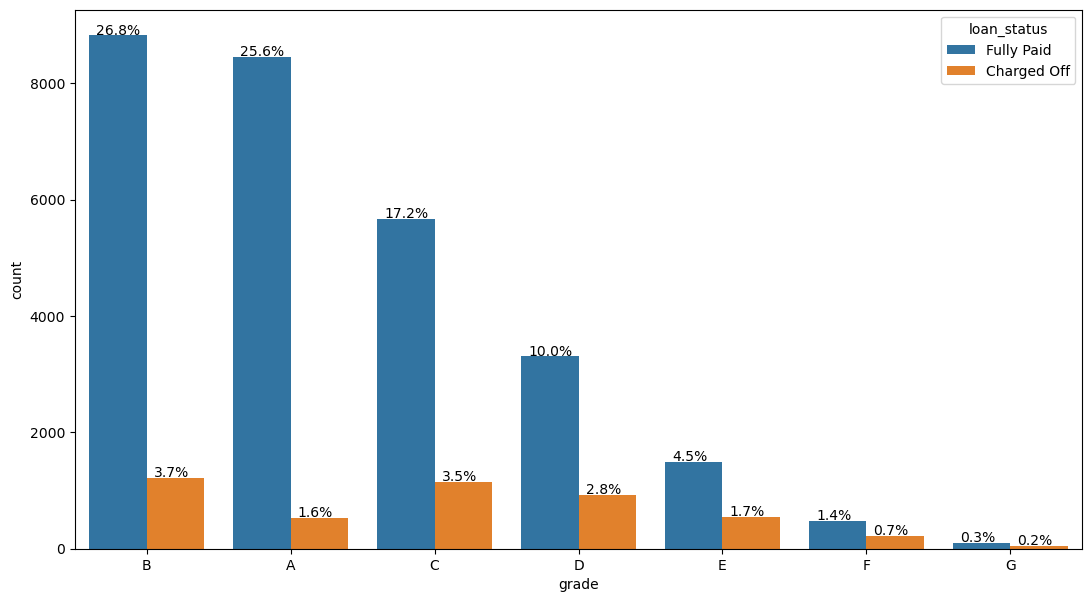

In [73]:
series_plot(loan_df, 'grade', 'loan_status')

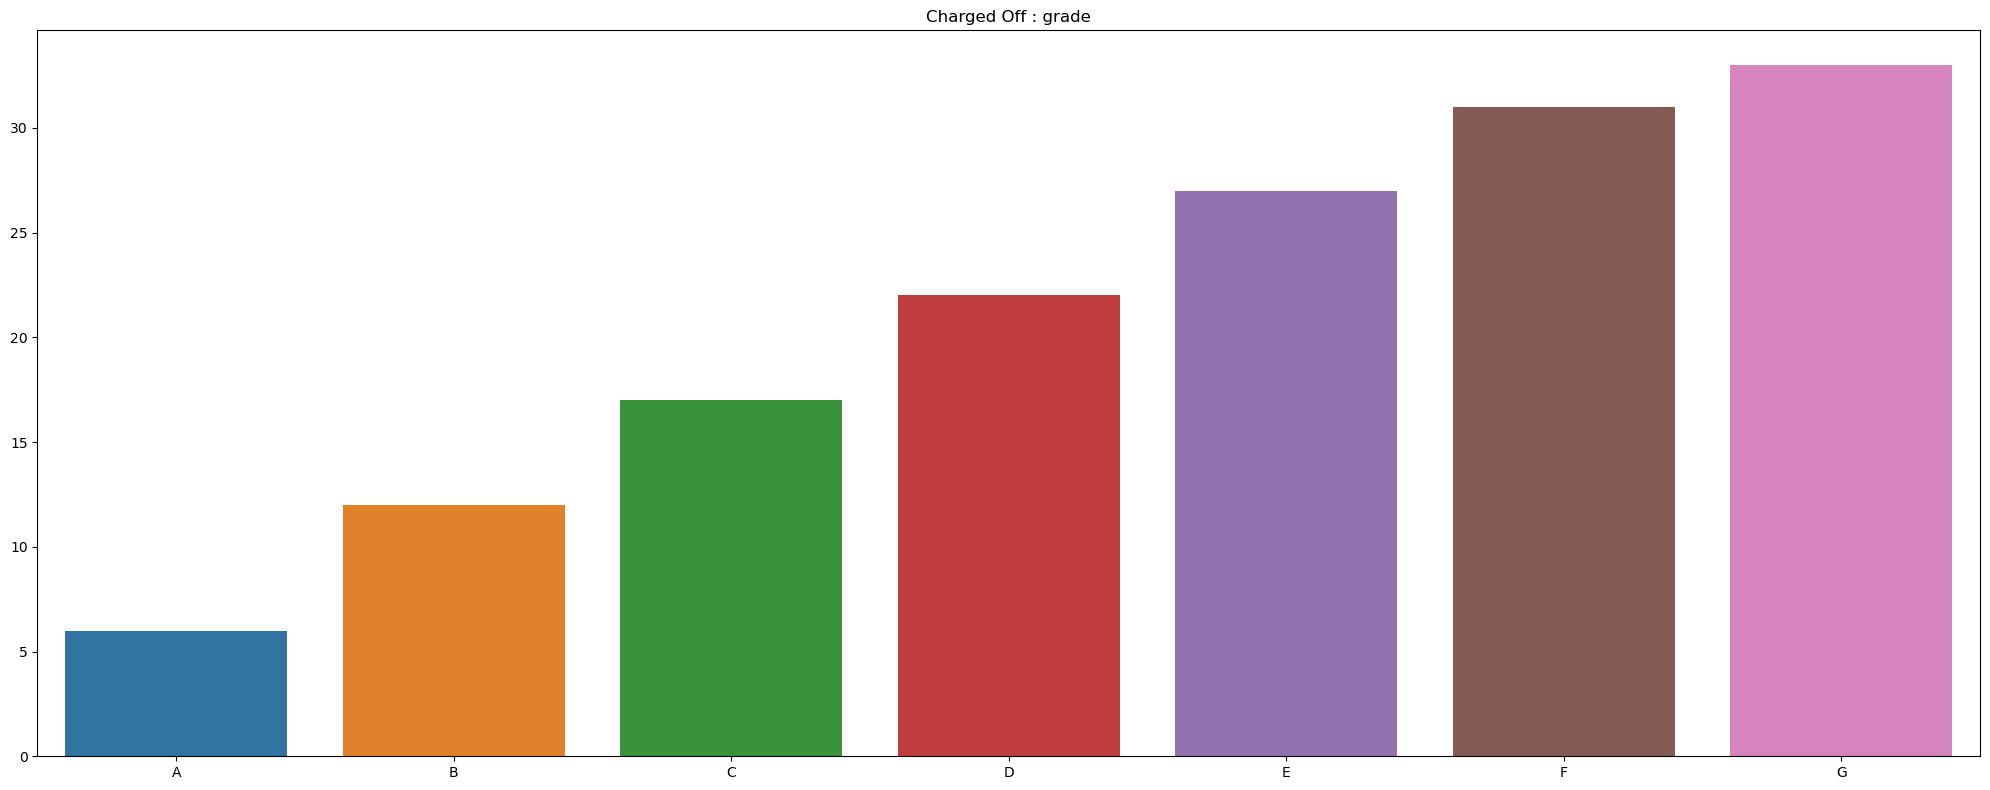

In [74]:
ratio_wise_plot(loan_df, 'grade')

**Summary :**

The majority of loan volume is in grade=B. The highest percentage of overall charge-offs is in grades B (3.7%) and C (3.5%). Analyzing the charge-off ratio within categories reveals the highest percentage in grade=G, with the highest cluster in grades G and F (>30%). Although Grade G has low volume , it doesn't significantly contribute to overall risk. Inferences suggest that the highest risk of charge-offs is in grades B and C, while grades F and G have very high chances of charge-offs with low volumes. Grade A has a low probability of charge-offs, and the risk increases from A to G.

Analysis of emp_length vs loan_status

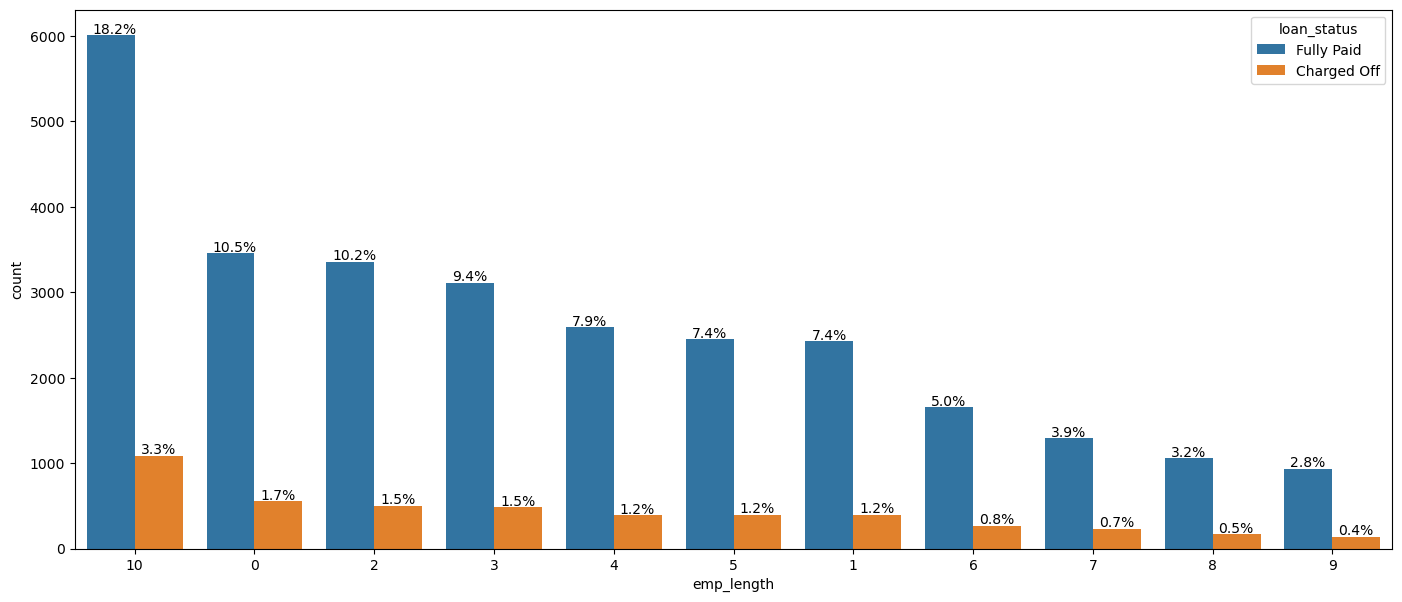

In [75]:
series_plot(loan_df, 'emp_length', 'loan_status')

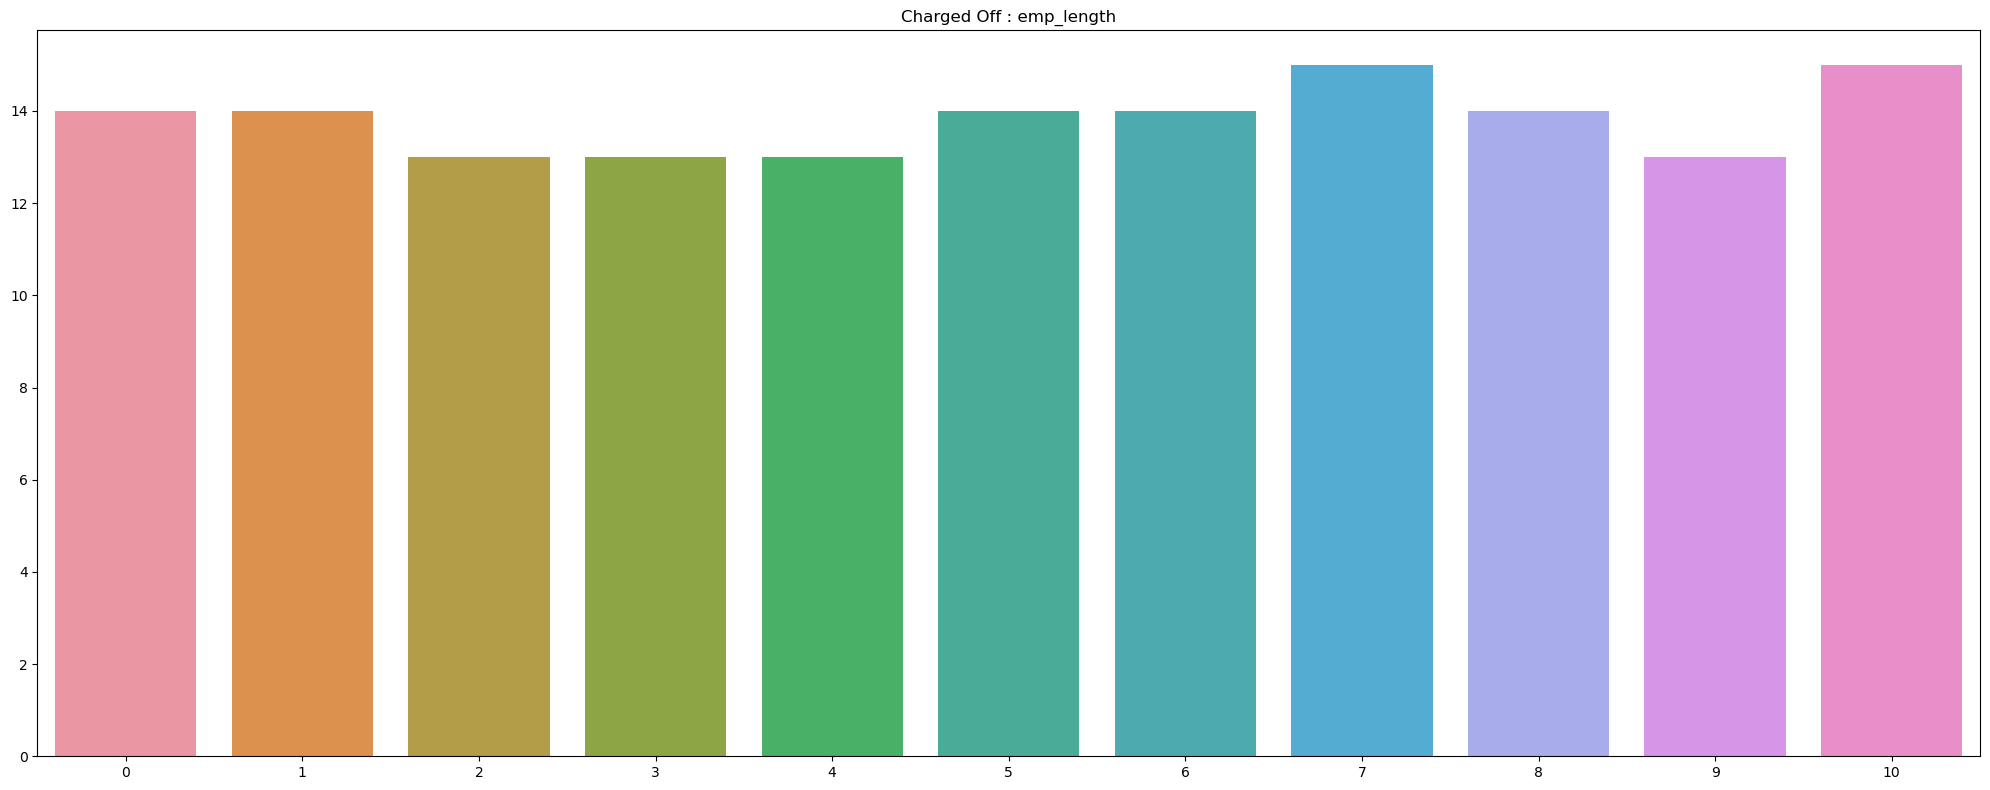

In [76]:
ratio_wise_plot(loan_df, 'emp_length')

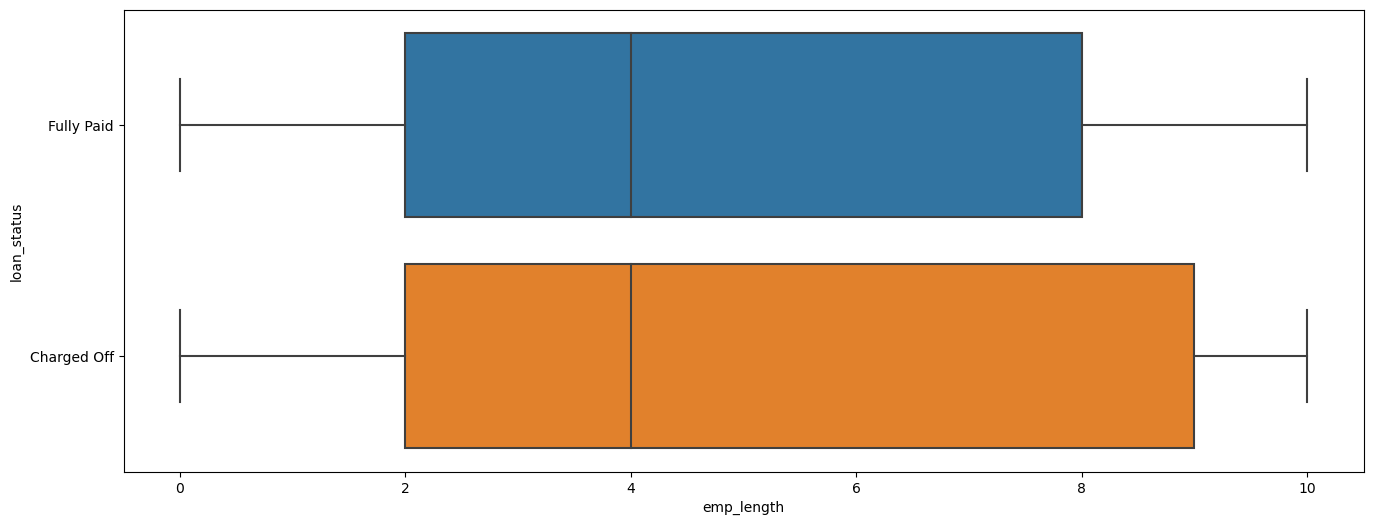

In [77]:
plt.figure(figsize=(16,6))
sns.boxplot(y=loan_df.loan_status,x=loan_df.emp_length)
plt.show()

**Summary :**

The analysis indicates that the highest charge-offs occur in the employee length category of 10 years and above. However, the charge-off ratio within these categories is similar and inconclusive. Inferences suggest that there is a high probability of charge-offs for individuals with an employee length of 10 years and above. Additionally, there is a higher probability of charge-offs for individuals with an income range of less than 1 year. However, the ratio within these income ranges is inconclusive.

Analysis of home_ownership vs loan_status

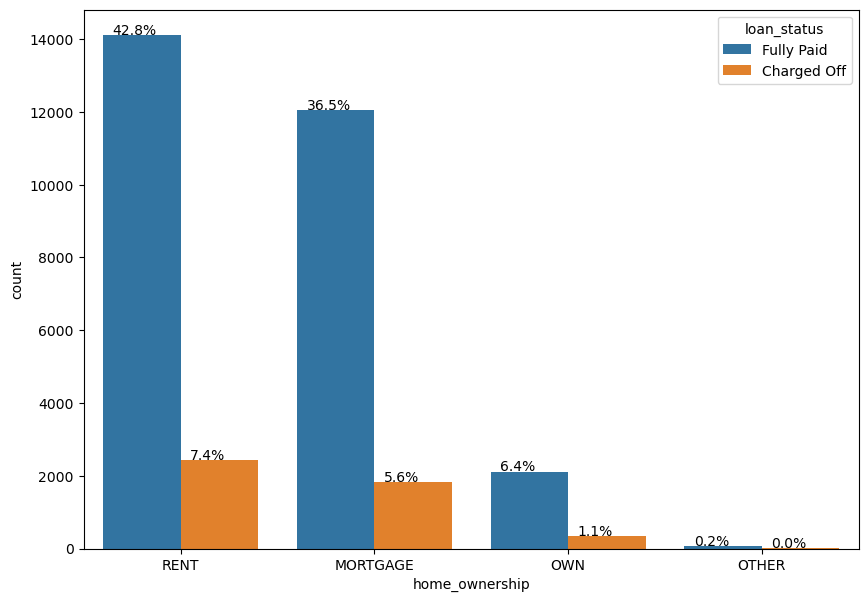

In [78]:
series_plot(loan_df, 'home_ownership', 'loan_status')

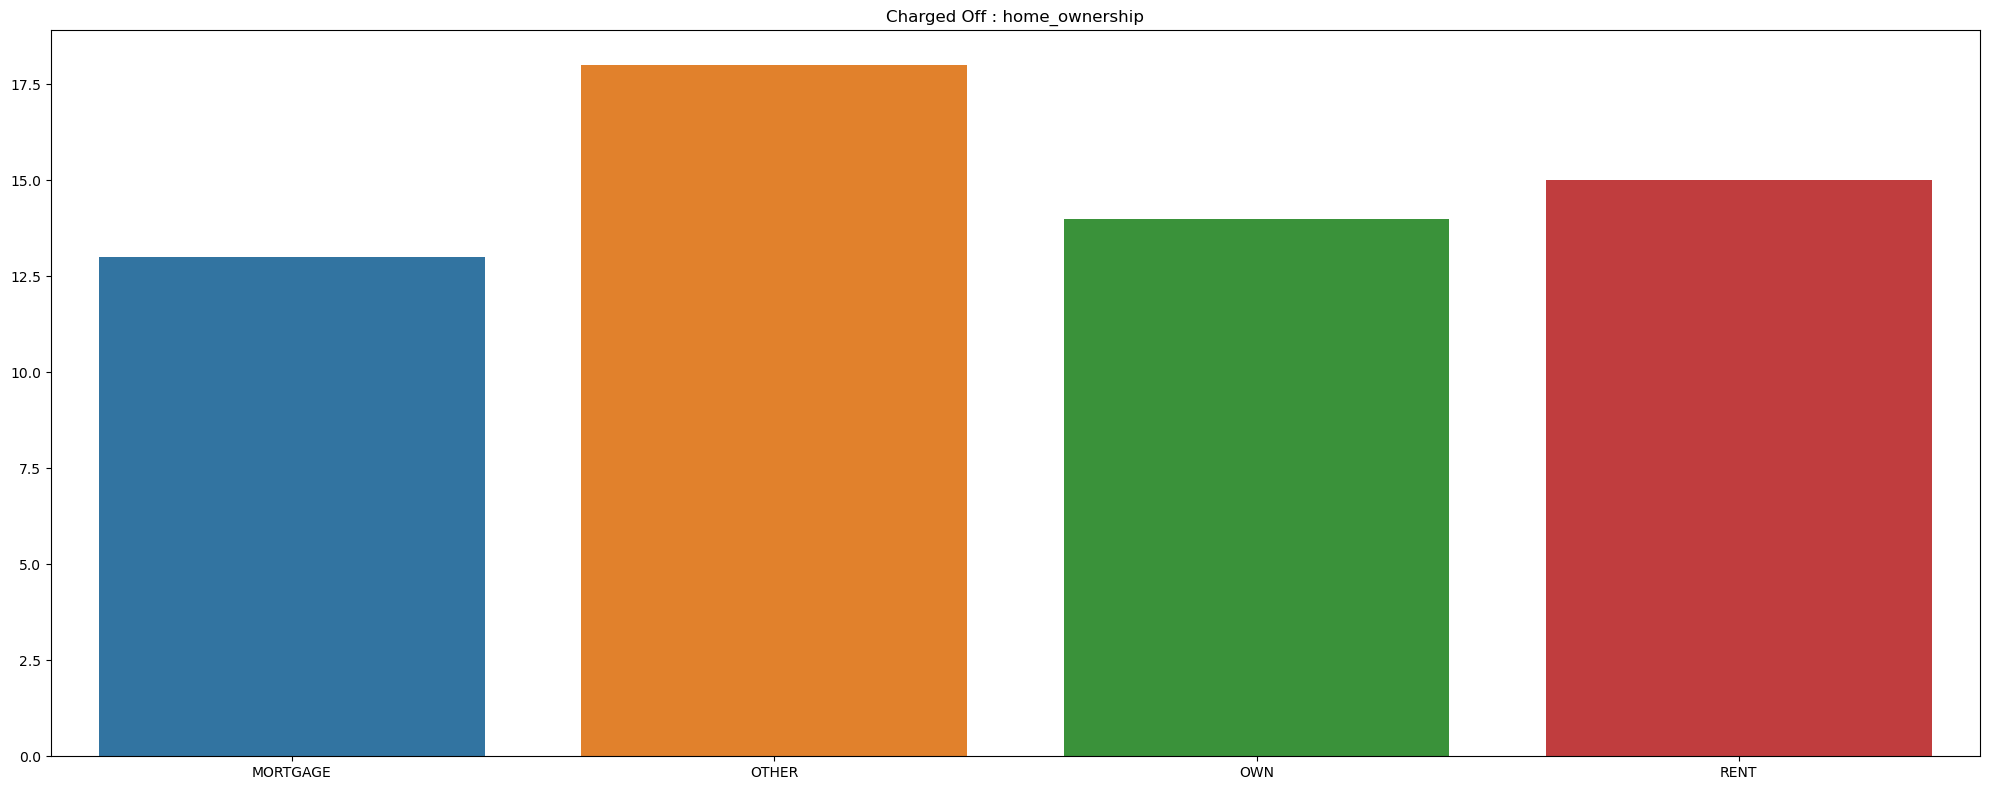

In [79]:
ratio_wise_plot(loan_df, 'home_ownership')

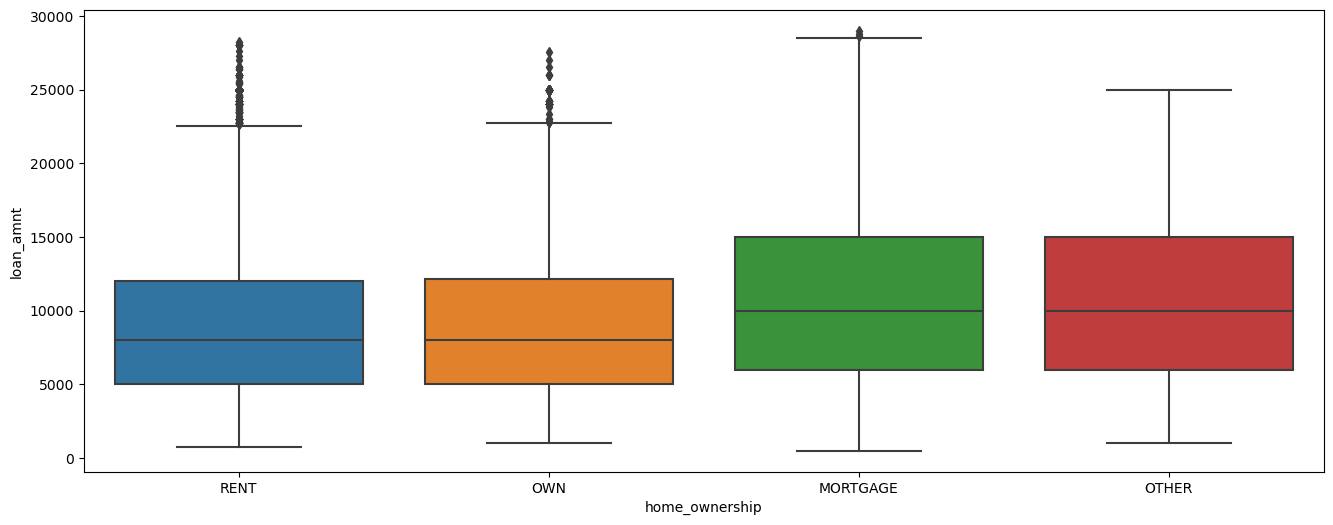

In [80]:
plot_box(loan_df,"home_ownership","loan_amnt")

**Summary :**

The analysis indicates that the overall highest number of charge-offs occurs in the home ownership categories of RENT and MORTGAGE. Within each home ownership category, the ratio of charge-offs for the "Other" category is higher. Inferences suggest that the home ownership statuses of MORTGAGE and RENT are at the highest risk of charge-offs. The MORTGAGE status also has the highest range of loan amounts, further increasing the risk.

Analysis of purpose vs loan status

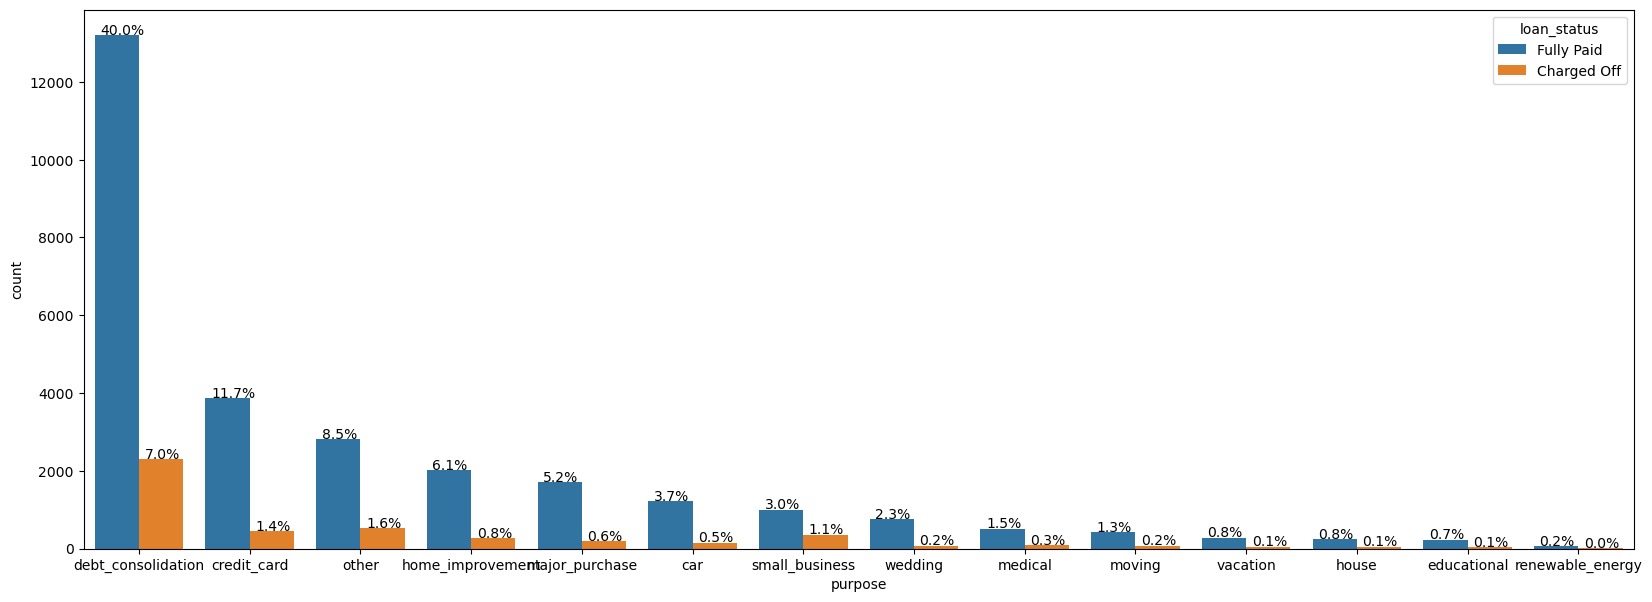

In [81]:
series_plot(loan_df, 'purpose', 'loan_status')

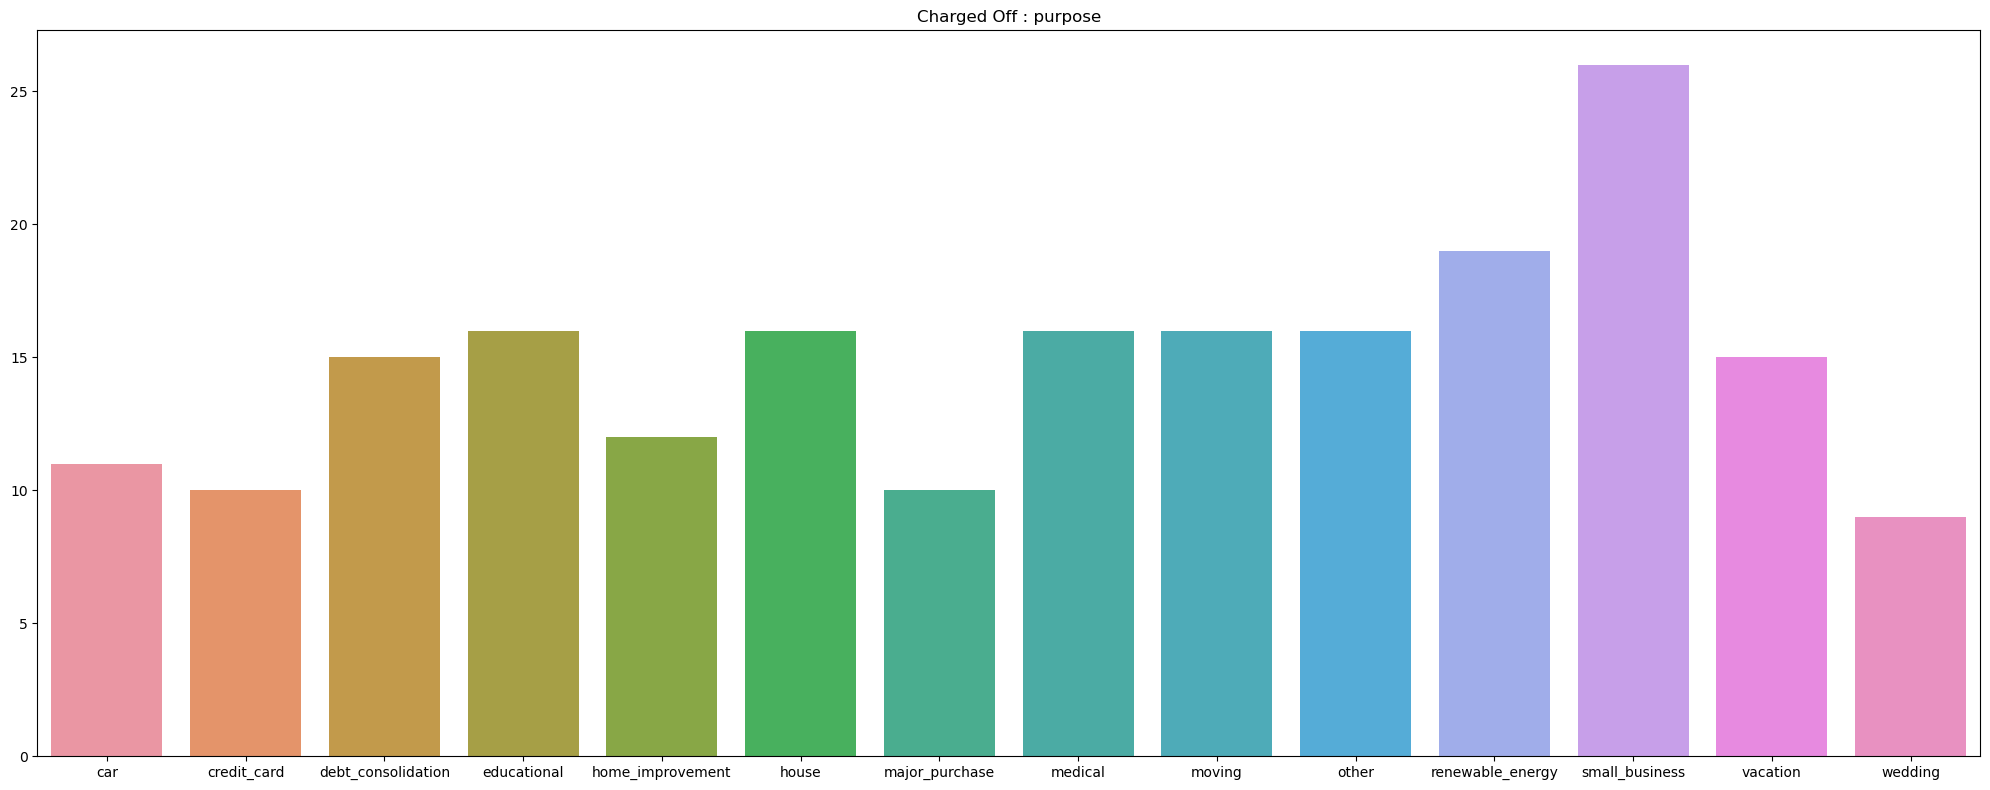

In [82]:
ratio_wise_plot(loan_df, 'purpose')

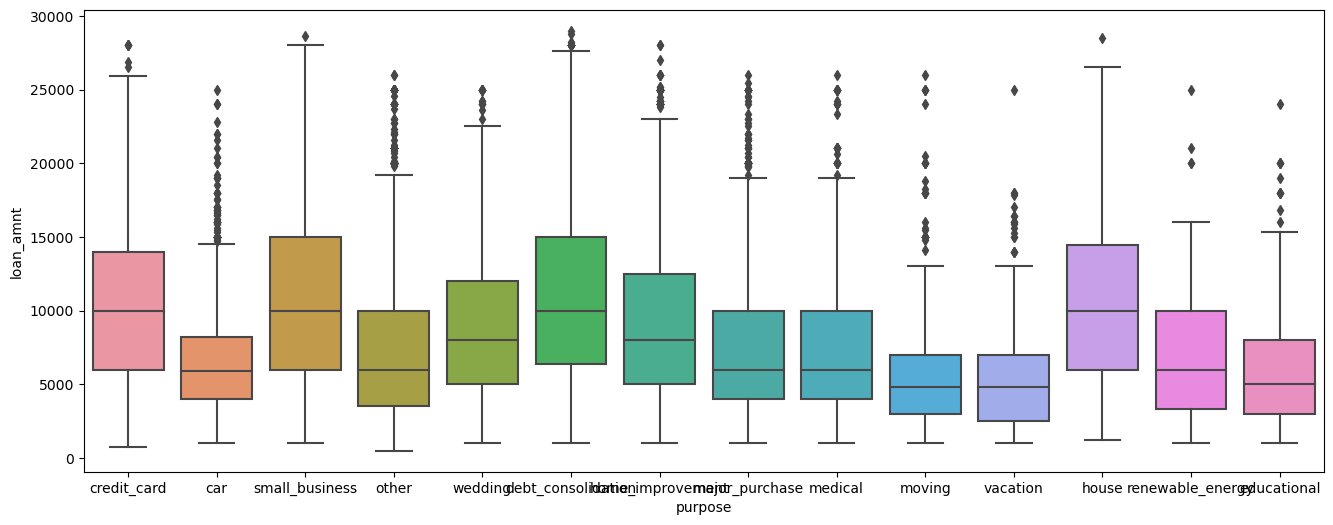

In [83]:
plot_box(loan_df,"purpose","loan_amnt")

**Summary :**

The analysis reveals that the highest risk of charge-offs is associated with the purpose of debt consolidation. Although small business has the highest probability of charge-offs within a category, the volume is extremely low. The highest loan amount ranges are observed in small business, debt consolidation, and house categories. Inferences suggest that debt consolidation poses the highest risk of charge-offs, small business applicants have a high probability of being charged off, and renewable energy has the lowest risk of charge-offs in terms of volume.

Analysis of addr_state vs loan state

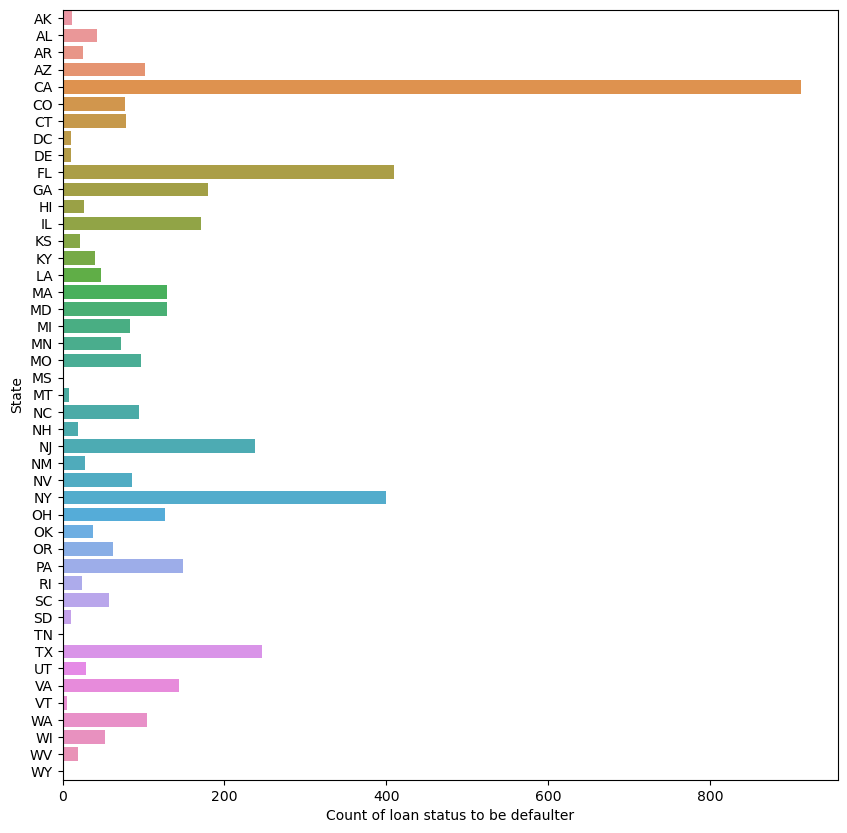

In [84]:


g = loan_df[loan_df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()



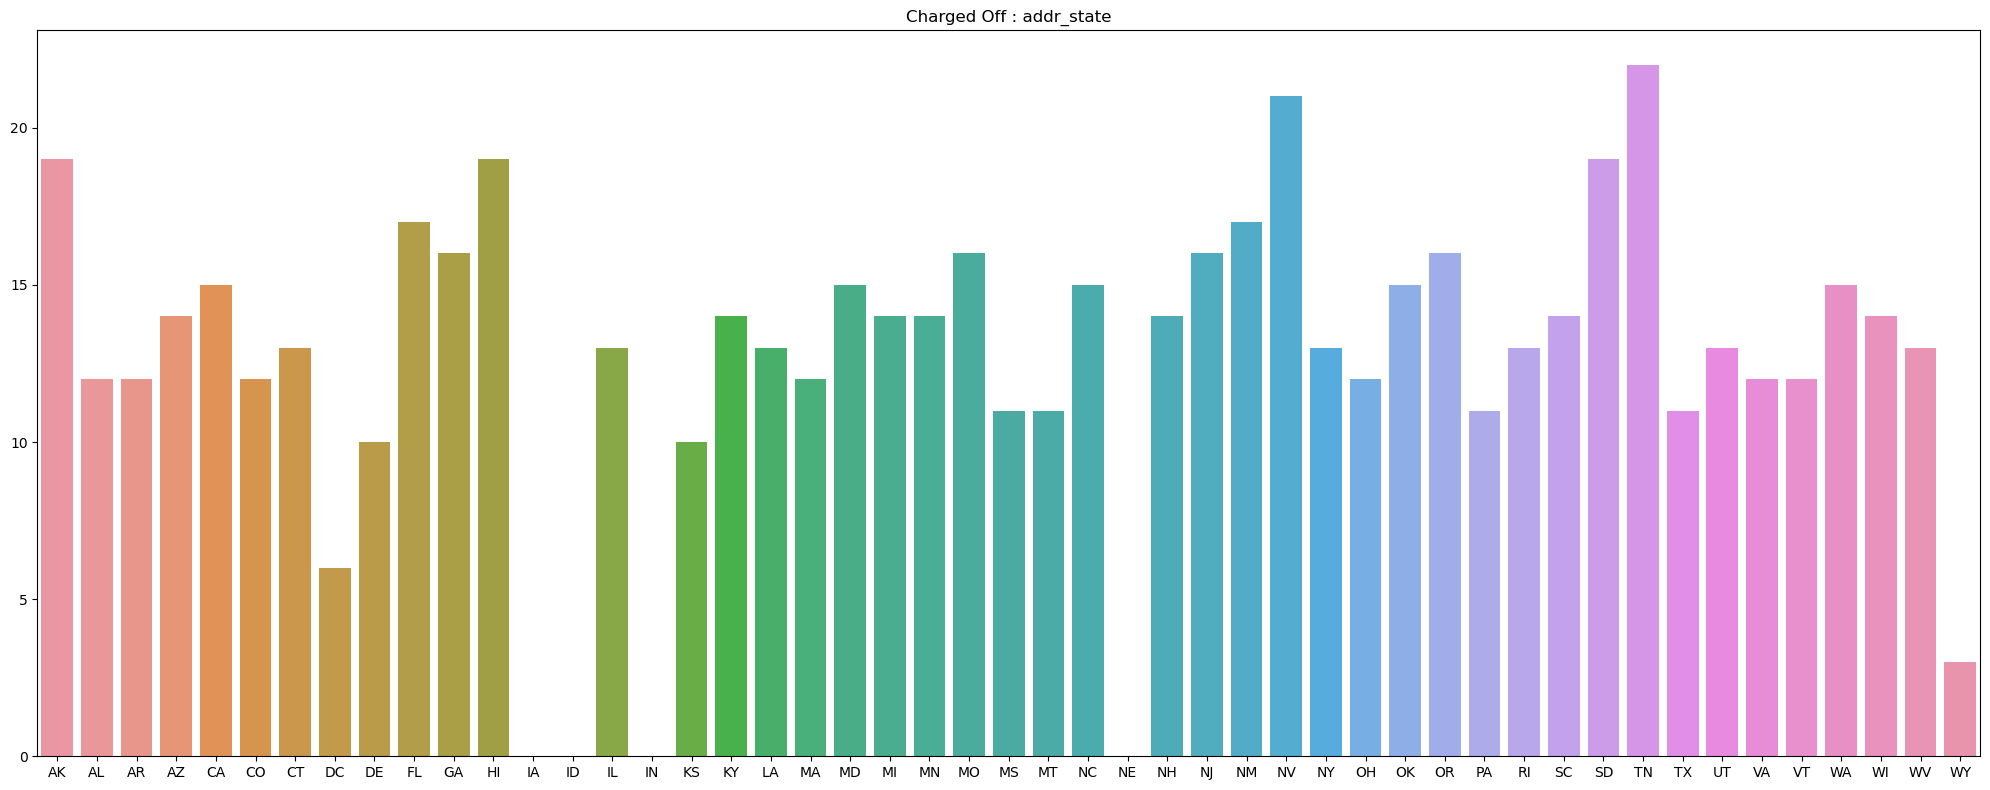

In [85]:
ratio_wise_plot(loan_df, 'addr_state')

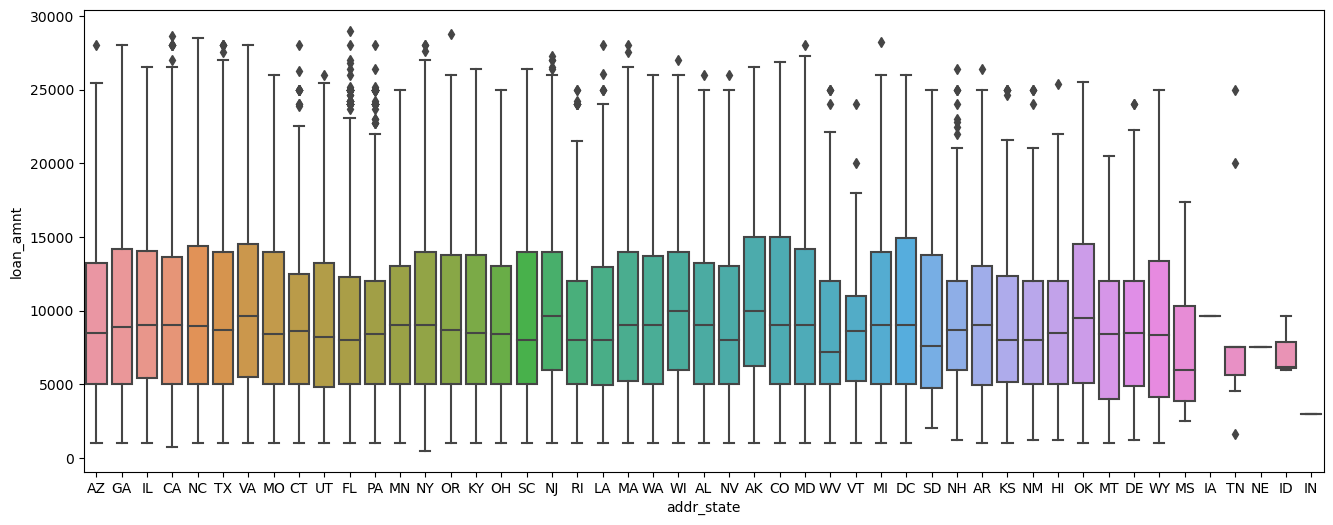

In [86]:
plot_box(loan_df,'addr_state','loan_amnt')

**Summary :**

The analysis indicates that California (CA) has the highest volume of loans, and purely based on volumes, the highest charge-offs are also from CA. However, when considering charge-offs within each state, Nebraska (NE) and Nevada (NV) have the highest charge-offs. Since NE has very low volume, it may not be considered significant. The inferences suggest that loan applications from Nevada (NV) have a high risk of charge-offs. Nebraska (NE) has a very high probability of charge-offs, but the volume is too low to be considered. Nevada (NV), California (CA), and Florida (FL) have a high percentage of charge-offs.

Analysis of pub_rec_bankruptcies vs loan_status

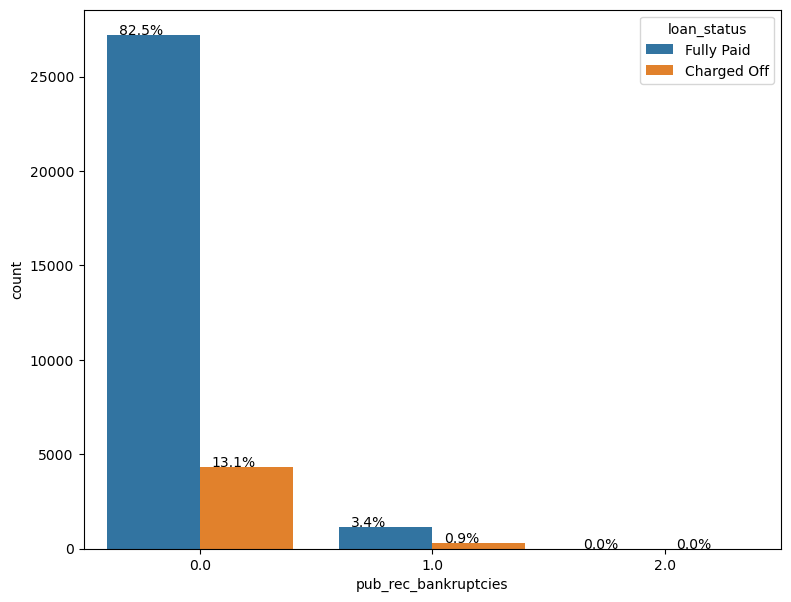

In [87]:
series_plot(loan_df, 'pub_rec_bankruptcies', 'loan_status')

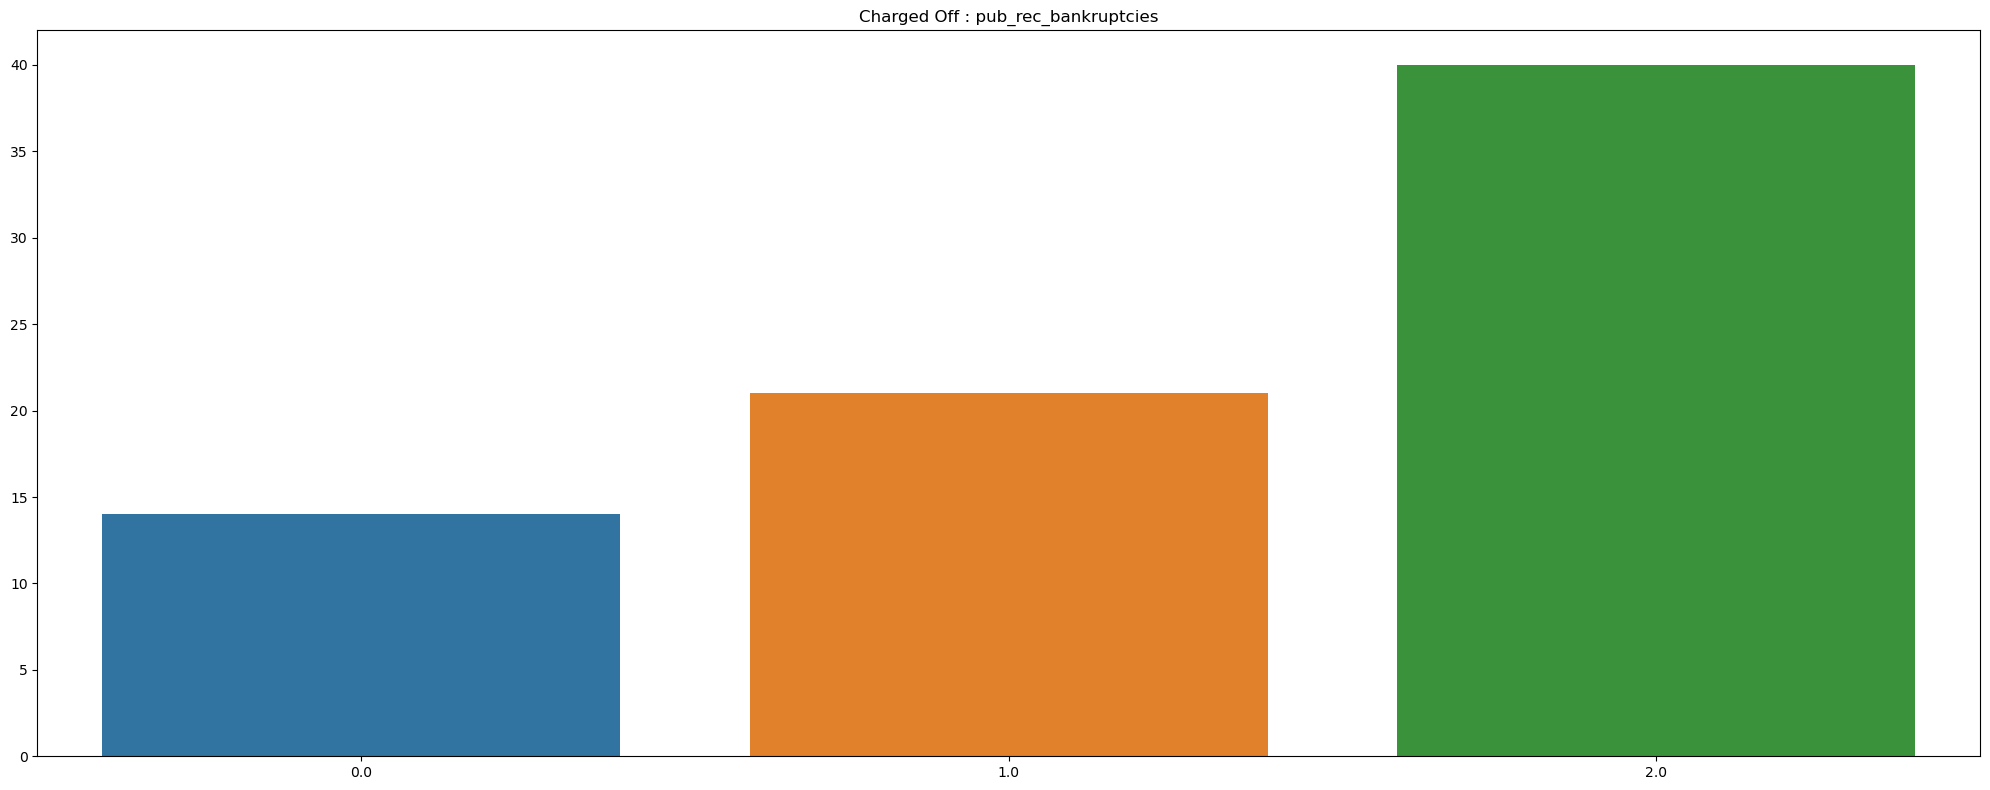

In [88]:
ratio_wise_plot(loan_df, 'pub_rec_bankruptcies')

**Summary :**

The analysis, based on volumes, shows that the highest number of charge-offs is in the category of 0 (no bankruptcy record). However, when considering ratios within each category, customers with a bankruptcy record have a higher charge-off ratio. Inferences suggest that customers with a bankruptcy record are at a high risk of charge-offs, and those with a pub_rec_bankruptcies count of 2 have an even higher charge-off ratio.

In [89]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'pub_rec_bankruptcies',
       'issued_year', 'issued_month', 'issued_quarter', 'loan_amnt_bin',
       'funded_amnt_inv_bin', 'funded_amnt_bin', 'annual_inc_bin',
       'int_rate_bin', 'dti_bin'],
      dtype='object')

Analysis of issued_quarter vs loan_status

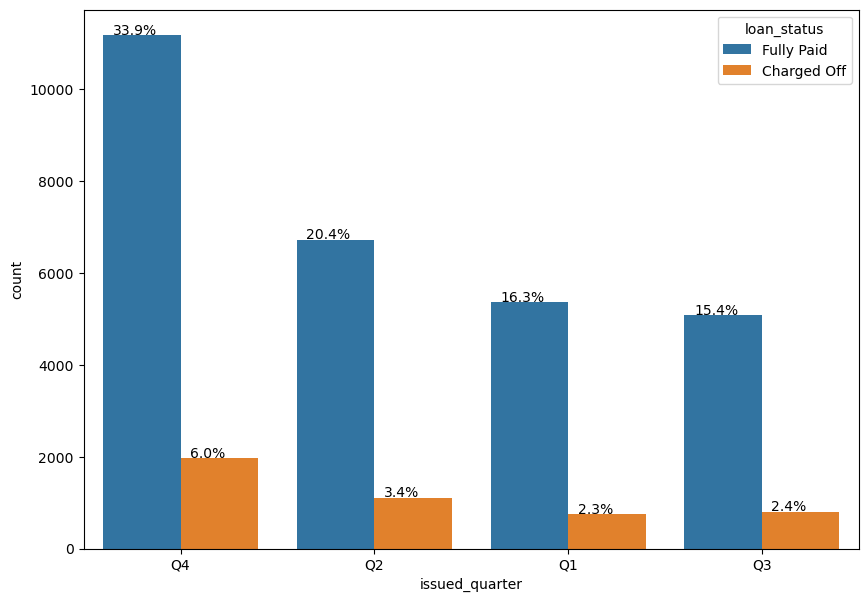

In [90]:
series_plot(loan_df, 'issued_quarter', 'loan_status')

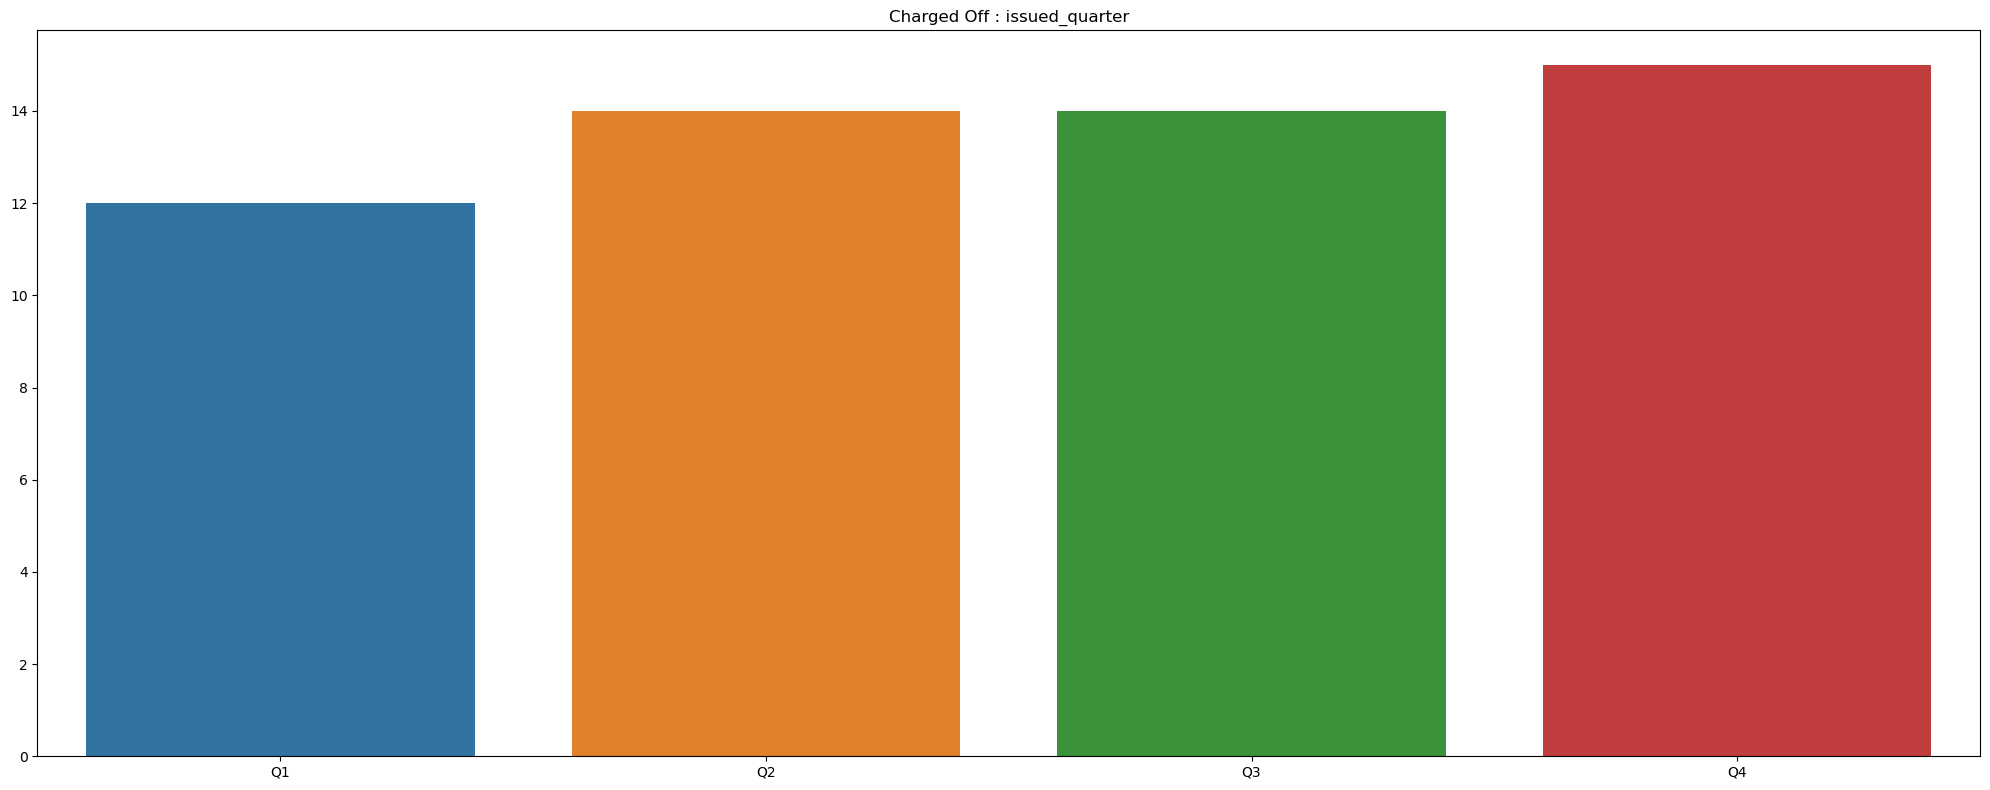

In [91]:
ratio_wise_plot(loan_df, 'issued_quarter')

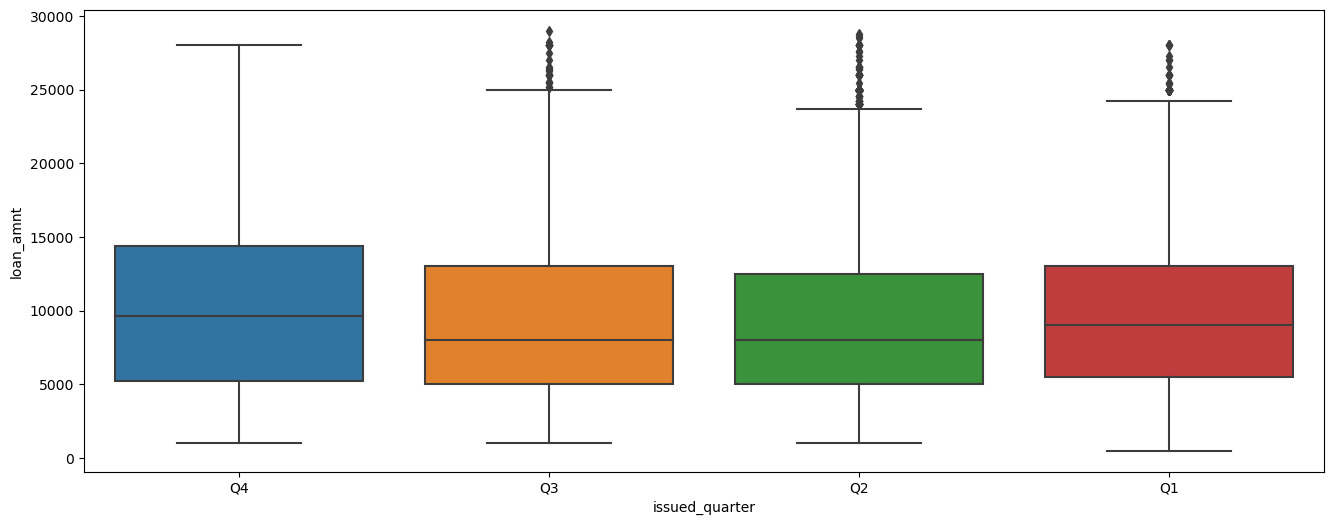

In [92]:
plot_box(loan_df,'issued_quarter','loan_amnt')

**Summary :**

The analysis indicates that Quarter 4 has the highest ratio of charge-offs. The year itself does not have a significant impact, as the charge-offs increase primarily due to the increasing loan volume year over year. Notably, 2007 has the maximum charge-offs, suggesting that any current loan running, which started in 2007, may have a higher risk of charge-offs. Inferences suggest that Quarter 4 of the year has the highest charge-offs, and charge-offs are likely to increase year over year with the increasing loan volume.

Analysis of annual_inc_bin 

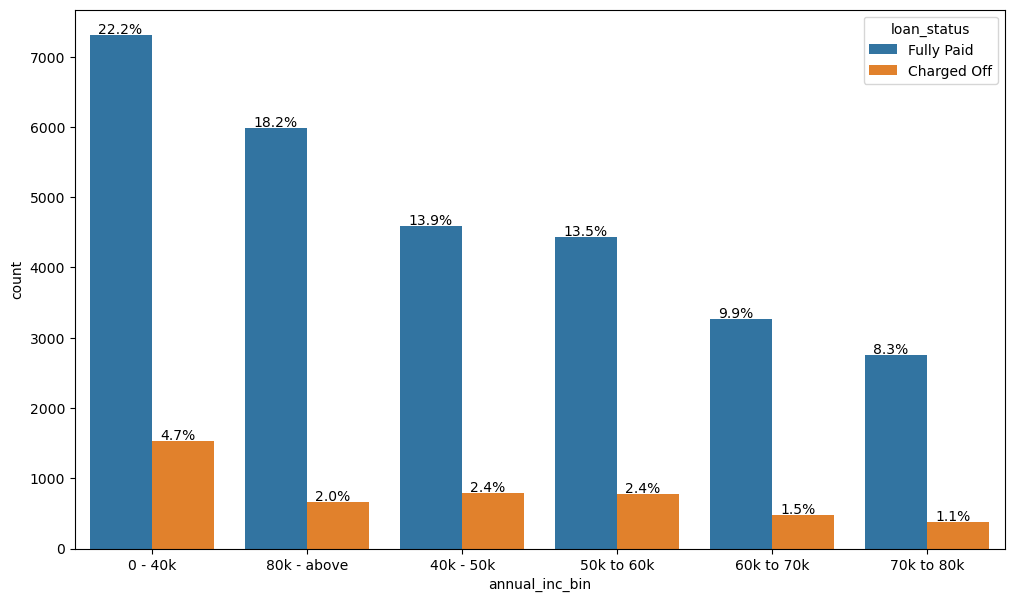

In [93]:
series_plot(loan_df, 'annual_inc_bin', 'loan_status')

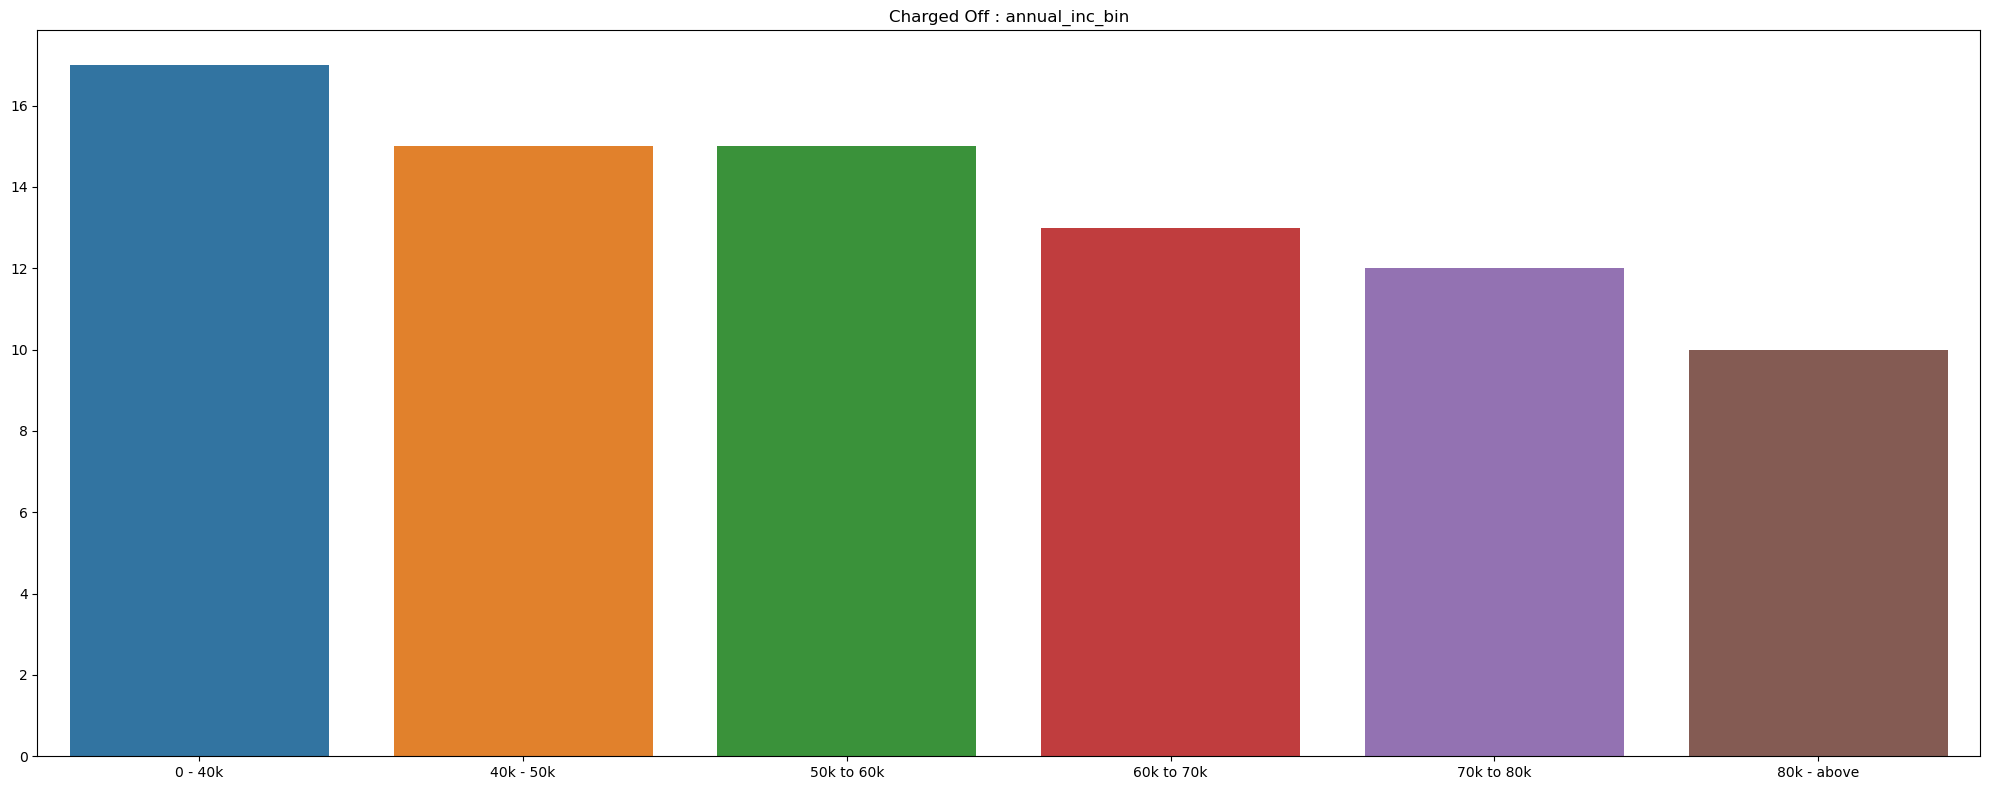

In [94]:
ratio_wise_plot(loan_df, 'annual_inc_bin')

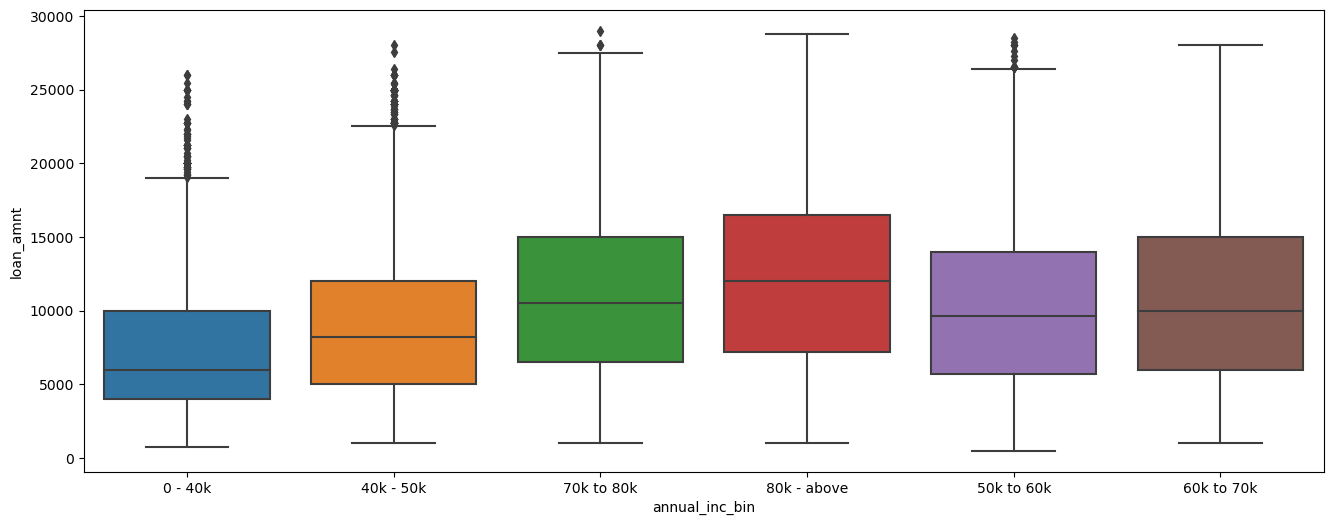

In [95]:
plot_box(loan_df,'annual_inc_bin','loan_amnt')

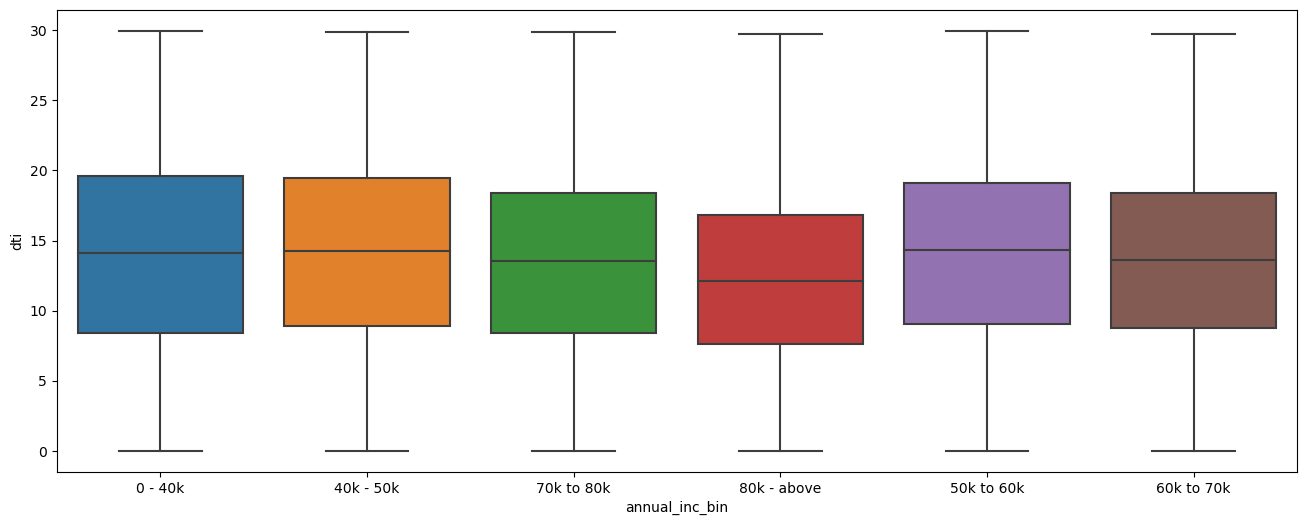

In [96]:
plot_box(loan_df,'annual_inc_bin','dti')

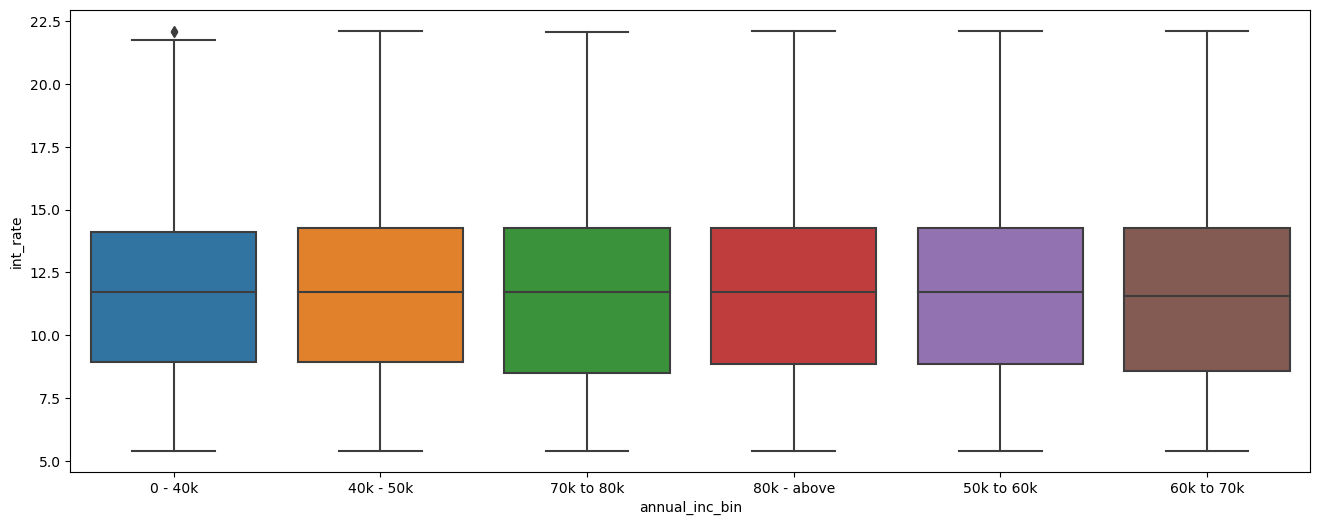

In [97]:
plot_box(loan_df,'annual_inc_bin','int_rate')

**Summary :**

The analysis reveals that the annual income range of 0-40K has the highest charge-offs. The charge-off ratio within the bucket of 0-40K also has the highest charge-offs. Inferences suggest that individuals with an income range of 0-40K have the highest risk of charge-offs. In contrast, individuals with an income range of 80000+ have less chance of being charged off. The analysis indicates a decrease in the proportion of charge-offs with an increase in annual income.

Analysis of loan_amnt_bin

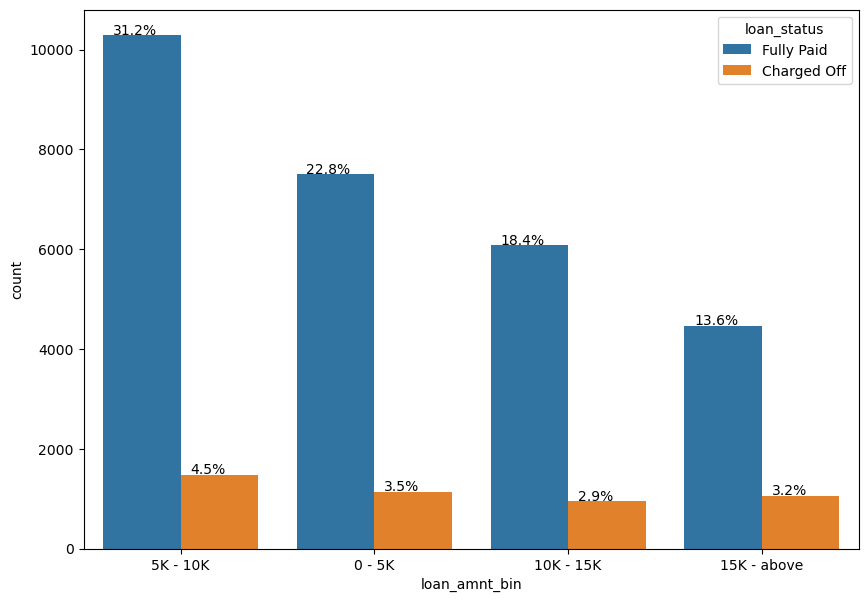

In [98]:
series_plot(loan_df, 'loan_amnt_bin', 'loan_status')

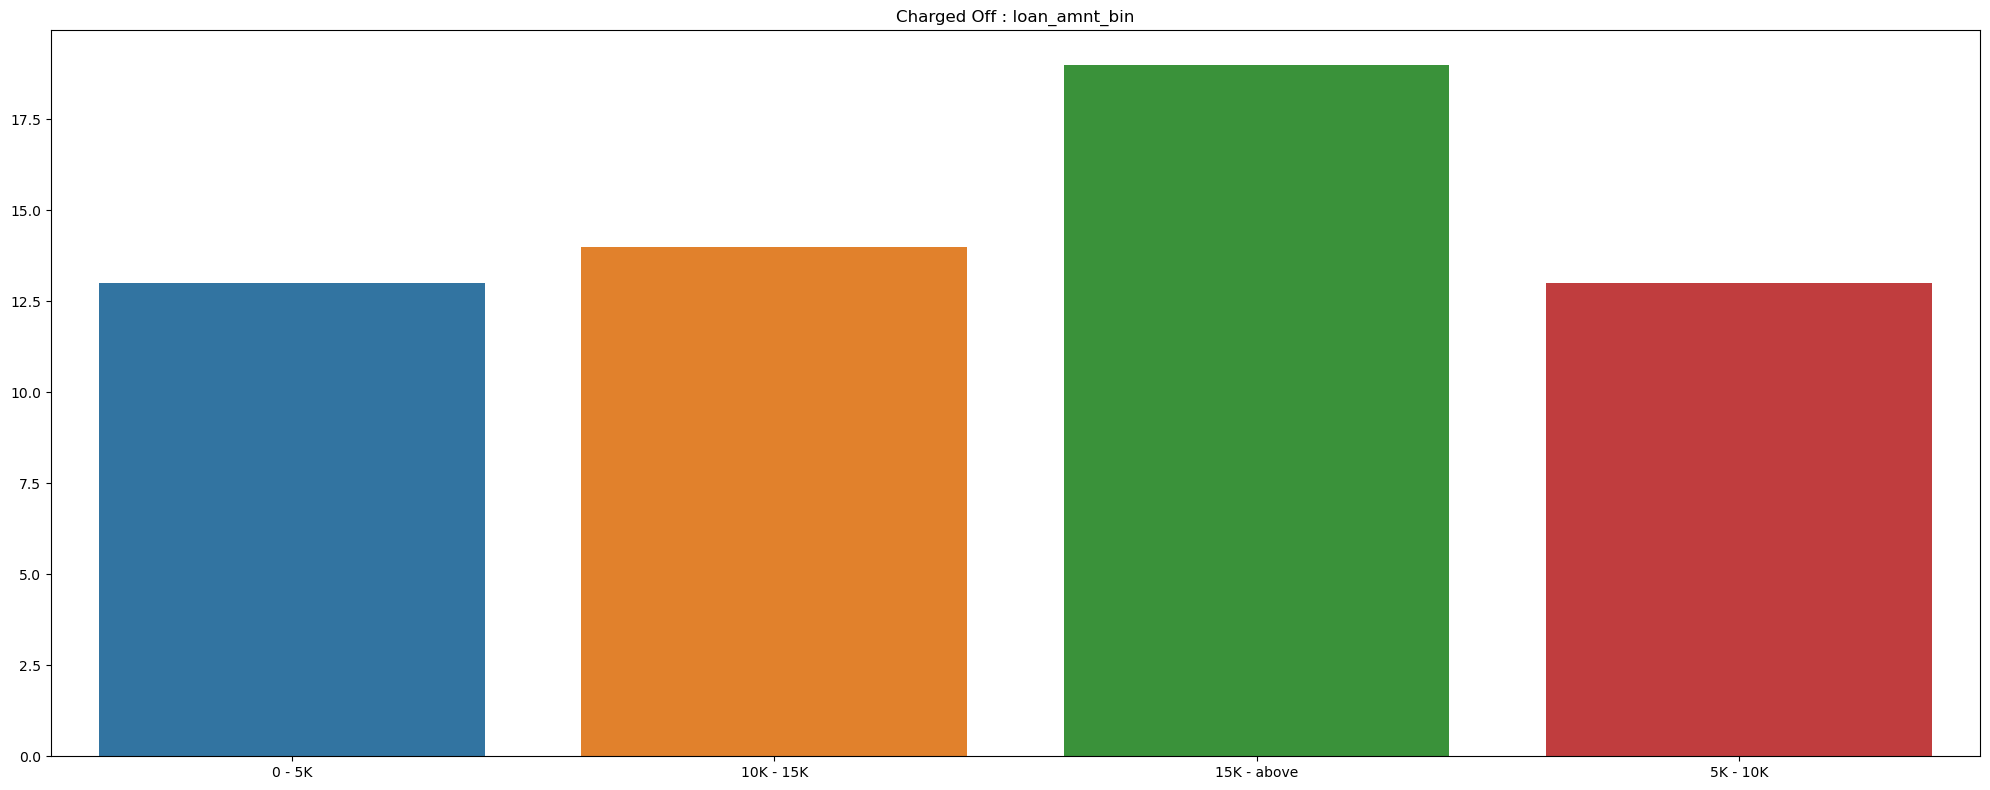

In [99]:
ratio_wise_plot(loan_df, 'loan_amnt_bin')

**Summary :**

The analysis indicates that, based on volume, the highest percentage of charge-offs is in the loan amount category of 5K to 10K. However, when considering the charge-off ratio, all customers within the loan amount of 15K and above are at the highest risk of charge-offs. Inferences suggest that the charge-off risk for loan amounts of 15K and above is the highest.

Analysis int_rate_bin

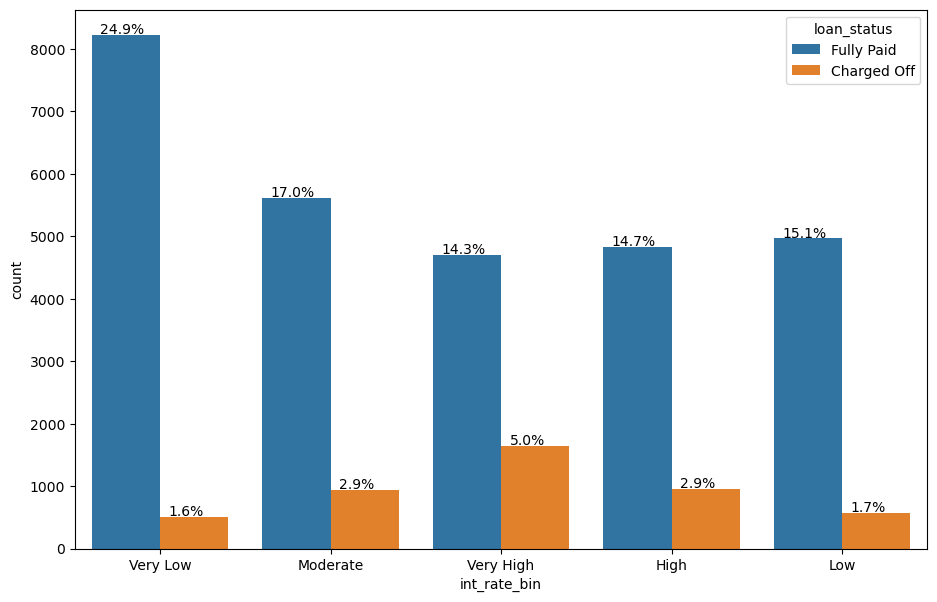

In [100]:
series_plot(loan_df, 'int_rate_bin', 'loan_status')

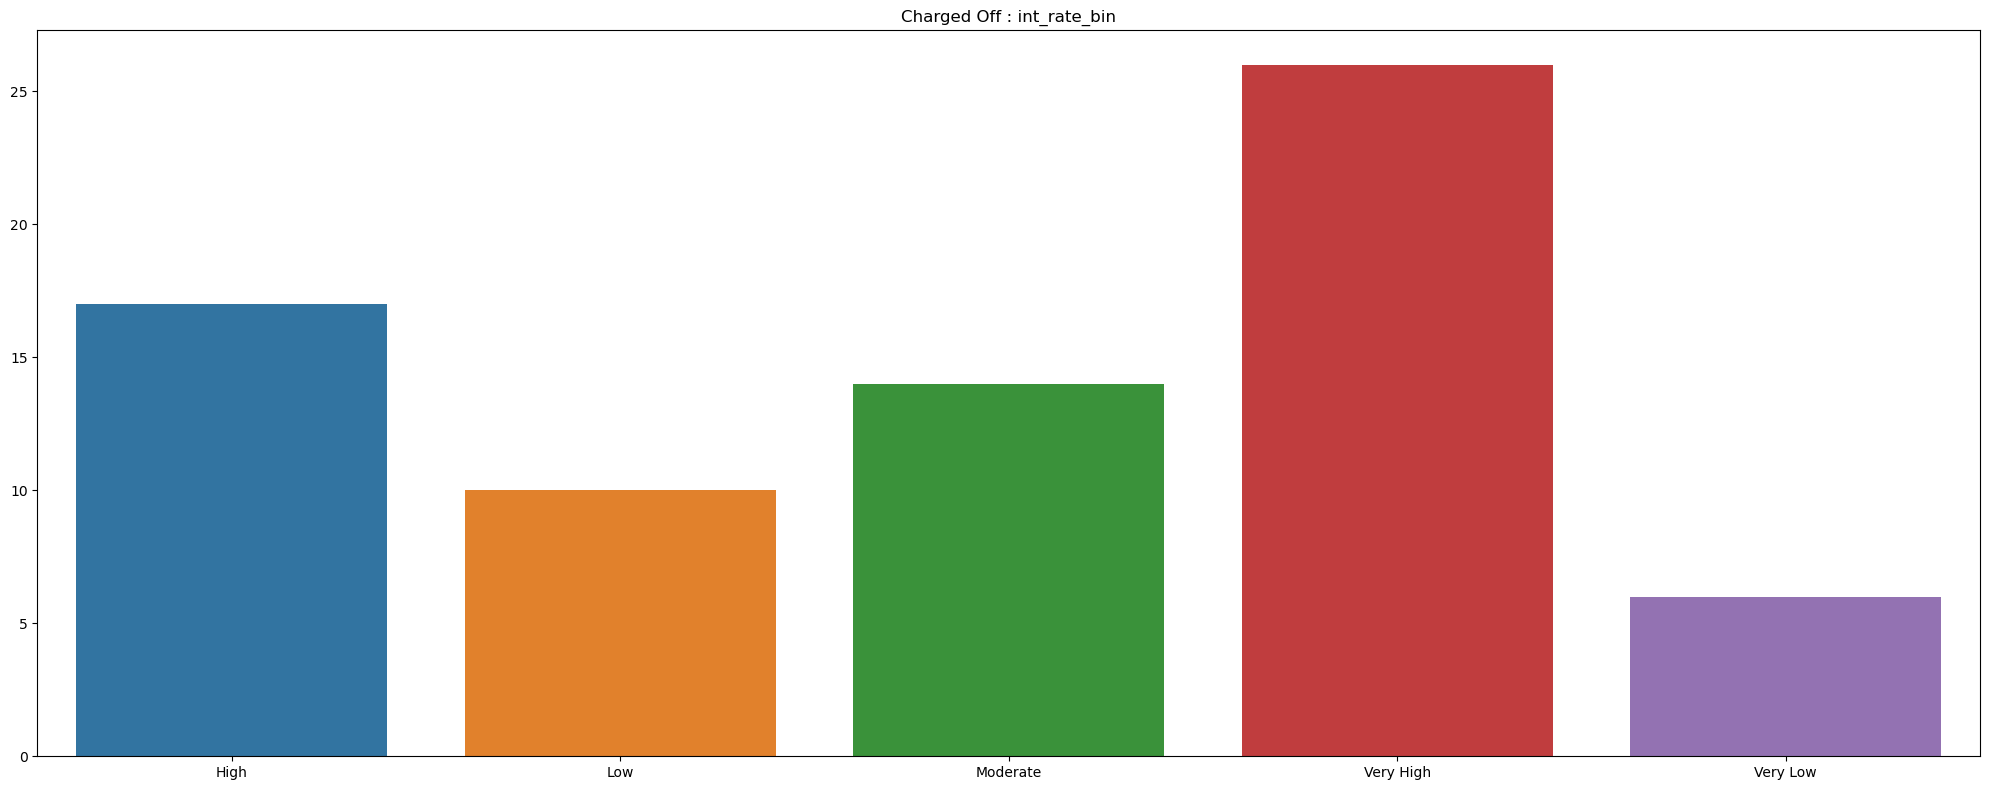

In [101]:
ratio_wise_plot(loan_df, 'int_rate_bin')

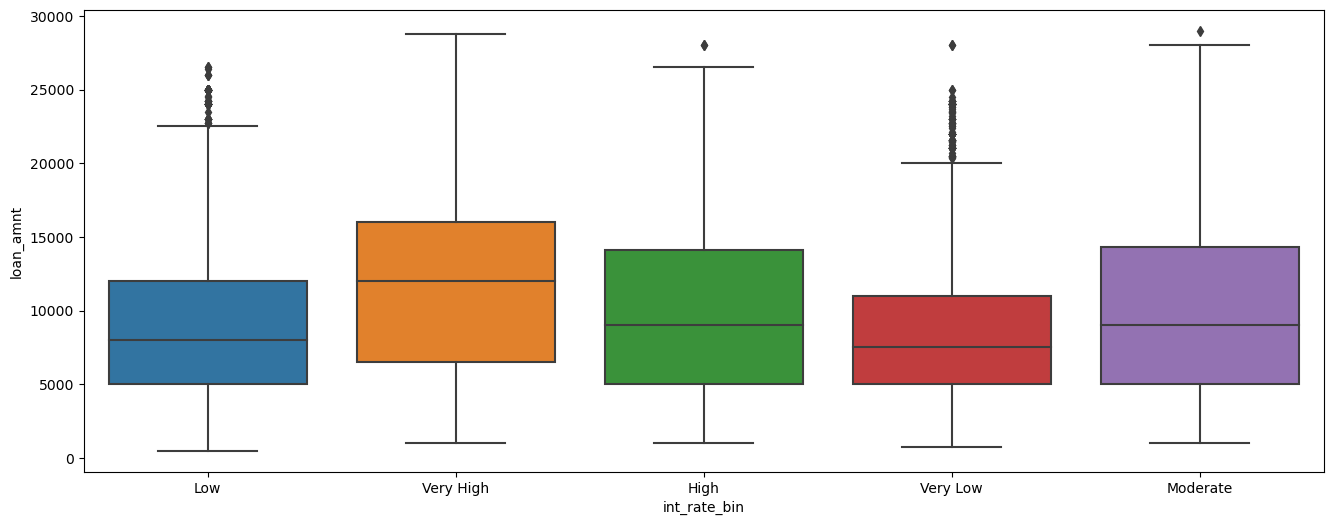

In [102]:
plot_box(loan_df,'int_rate_bin','loan_amnt')

**Summary :**

The analysis indicates that, both based on volume and charge-off ratio within the category, loans with very high-interest rates (15% and above) are at risk of charge-offs. Inferences suggest that loans with very high-interest rates pose a higher risk of charge-offs.

## 8) Correlation Analysis

In [103]:
print(loan_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32955 entries, 0 to 39680
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    32955 non-null  int64         
 1   loan_amnt             32955 non-null  float64       
 2   funded_amnt           32955 non-null  float64       
 3   funded_amnt_inv       32955 non-null  float64       
 4   term                  32955 non-null  int64         
 5   int_rate              32955 non-null  float64       
 6   installment           32955 non-null  float64       
 7   grade                 32955 non-null  object        
 8   emp_length            32955 non-null  int64         
 9   home_ownership        32955 non-null  object        
 10  annual_inc            32955 non-null  float64       
 11  verification_status   32955 non-null  object        
 12  issue_d               32955 non-null  datetime64[ns]
 13  loan_status          

In [104]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'pub_rec_bankruptcies',
       'issued_year', 'issued_month', 'issued_quarter', 'loan_amnt_bin',
       'funded_amnt_inv_bin', 'funded_amnt_bin', 'annual_inc_bin',
       'int_rate_bin', 'dti_bin'],
      dtype='object')

In [105]:
corr_lst=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate','installment','emp_length','annual_inc','dti', 'pub_rec_bankruptcies','issued_year', 'issued_month']

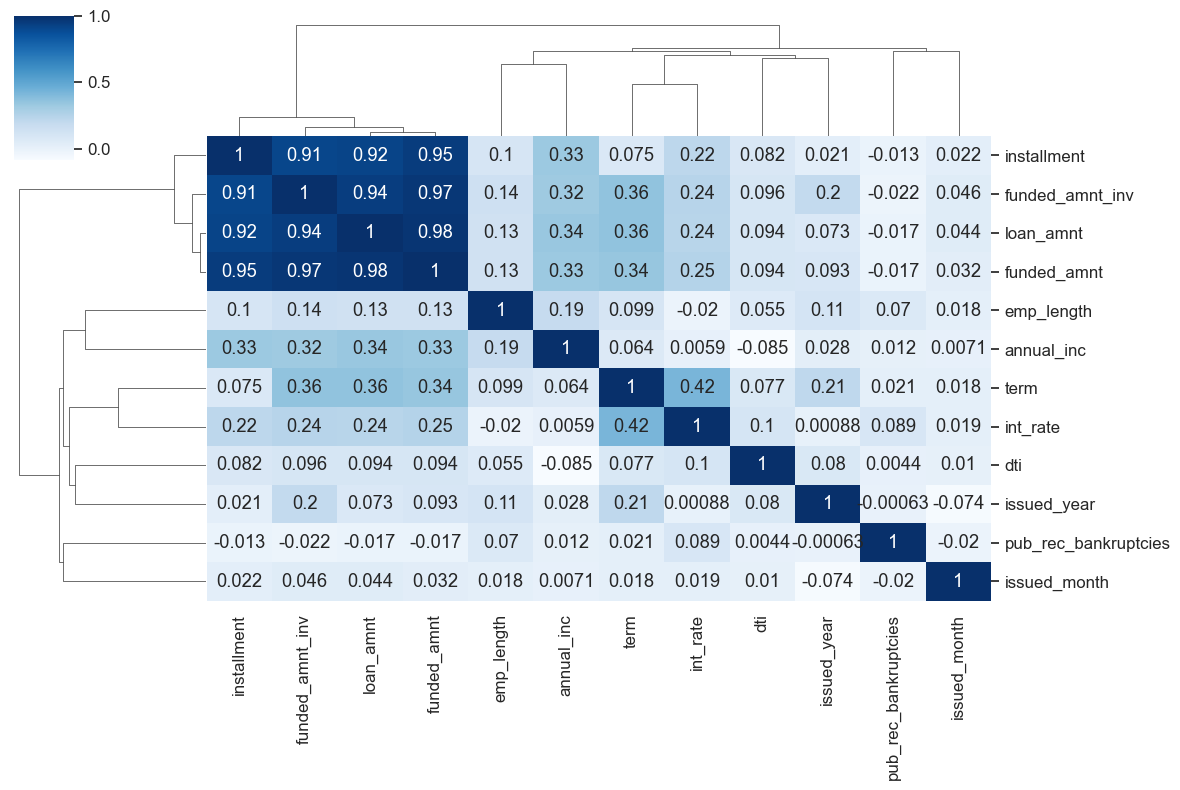

In [106]:
corr = loan_df[[*corr_lst]]
corr = corr.corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plt.show()

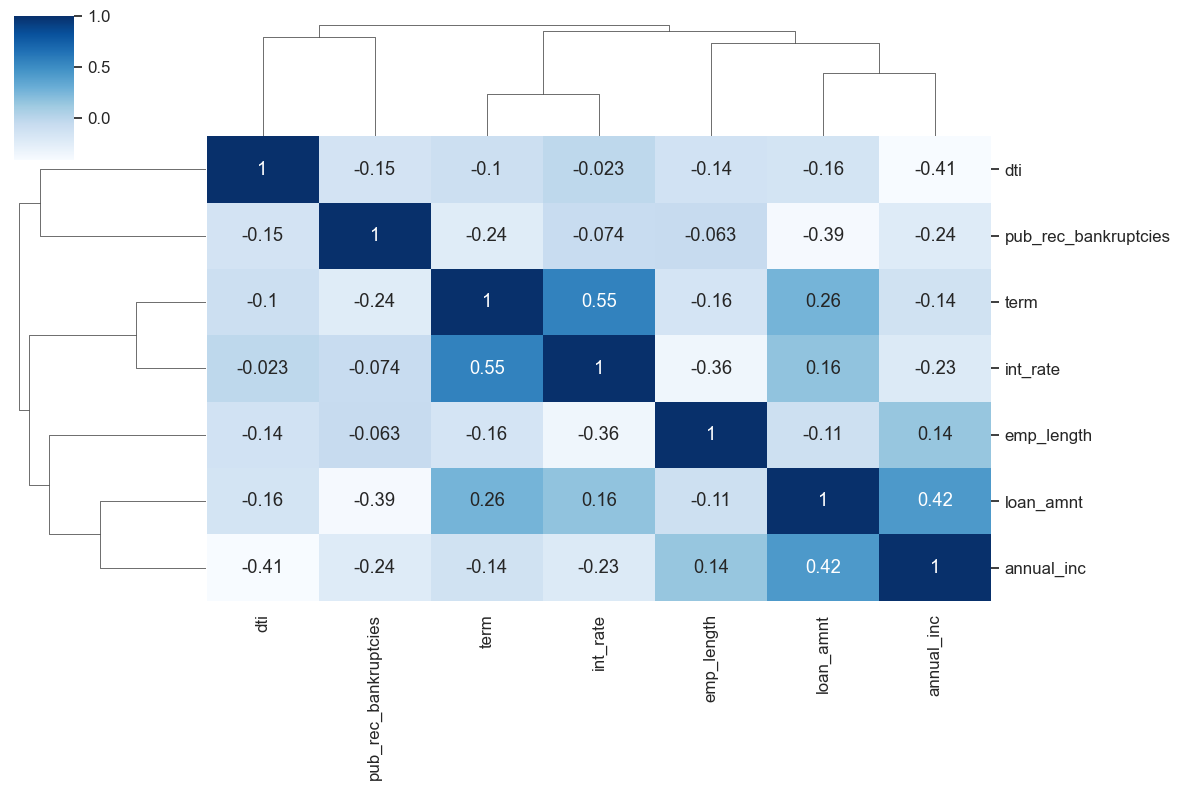

In [107]:
# Data-Cleanning
# Dropping redundant fields related to the 'loan_amnt'. They show high correlation in the corr-matrix
# Dropping fields id which do not contribute to analysis
# Dropping fields issue_y and issue_m
drop_columns = ['installment', 'issued_year', 'issued_month','funded_amnt_inv','funded_amnt']
corr = corr.drop(columns=drop_columns)
corr = corr.corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plt.show()

Summary:

Negative Correlation:

- `loan_amnt` has a negative correlation with `pub_rec_bankruptcies`.
- `annual_inc` has a negative correlation with `dti` (debt-to-income ratio).

Strong Correlation:

- `term` has a strong correlation with `loan_amnt`.
- `term` has a strong correlation with `int_rate`.
- `annual_inc` has a strong correlation with `loan_amnt`.

Weak Correlation:

- `pub_rec_bankruptcies` has a weak correlation with most fields.

Inferences suggest that certain variables exhibit negative or strong correlations, providing insights into potential relationships within the dataset.

## 9) Summary Report

## Univariate Analysis

### Loan Characteristics
1. **Loan Amount:**
   - Majority: 5000 to 14000.
2. **Funded Amount:**
   - Majority: 5000 to 13000.
3. **Funded Amount Inv:**
   - Majority: 5000 to 12000.
4. **Interest Rate:**
   - Majority: 5% to 16%, max at 22%.
5. **Installment:**
   - Majority: 20 to 400, max at 700.
6. **Annual Income:**
   - Majority: 4000 to 40000, max at 12000 (Outlier treatment required).
7. **Debt-to-Income (DTI):**
   - Majority: 0 to 20, max at 30.

### Loan Attributes
8. **Loan Term:**
   - Majority: 36 months.
9. **Loan Grade:**
   - Majority: Grade B.
10. **Employment Length:**
    - Majority: 10+ years, then 0-2 years.
11. **Public Records of Bankruptcies:**
    - Majority: No bankruptcies.

### Home Ownership and Purpose
12. **Home Ownership:**
    - Majority: RENT and MORTGAGE.
13. **Loan Purpose:**
    - Majority: Debt Consolidation.
14. **State-wise Distribution:**
    - CA has the maximum loan applications.

### Temporal Trends
15. **Yearly Trends:**
    - Loan application counts are increasing yearly.
16. **Monthly Trends:**
    - Lowest counts: Jan, Feb, March; Highest counts: Oct, Nov, Dec.
17. **Quarterly Trends:**
    - Highest loan application volume in Quarter 4.

### Loan Amount Analysis
18. **Loan Amount Ranges:**
    - Highest applications: 5K to 10K.

### Borrower Attributes
19. **Annual Income Ranges:**
    - Majority: 0 - 40K.
20. **Interest Rate Ranges:**
    - Majority: Very Low.
21. **Debt-to-Income Ratio:**
    - Majority: Moderate.

## Bivariate Analysis

### Loan Characteristics vs. Charge Offs
22. **Loan Term vs. Charge Offs:**
    - Term=60 applications may require more scrutiny.
23. **Loan Grade vs. Charge Offs:**
    - Highest risk in grades B and C; F and G have high chances with low volumes.
24. **Employment Length vs. Charge Offs:**
    - 10+ years have high probability; higher risk for < 1 year income range.
25. **Home Ownership vs. Charge Offs:**
    - MORTGAGE and RENT statuses are at the highest risk.

### Purpose and Location Analysis
26. **Loan Purpose vs. Charge Offs:**
    - Debt Consolidation poses the highest risk; Small business has high probability.
27. **State-wise Analysis:**
    - NV (Nevada) has a high risk of Charge Offs; CA, FL also have high percentages.

### Bankruptcy and Temporal Trends
28. **Bankruptcy Record vs. Charge Offs:**
    - Customers with bankruptcy records are at high risk; pub_rec_bankruptcies count of 2 has higher ratio.
29. **Quarterly and Yearly Trends:**
    - Highest charge-offs in Q4; 2007 has the maximum charge-offs.

### Income and Loan Amount
30. **Income Range vs. Charge Offs:**
    - 0-40K income range has the highest risk; decreasing proportion with higher income.
31. **Loan Amount vs. Charge Offs:**
    - Loan amount of 15K and above has the highest risk.

### Interest Rate Analysis
32. **Interest Rate vs. Charge Offs:**
    - Very high-interest rates (15% and above) pose a higher risk.

## Correlation Analysis

### Negative Correlation
33. **Loan Amount vs. Bankruptcies:**
    - Negative correlation.
34. **Annual Income vs. DTI:**
    - Negative correlation.

### Strong Correlation
35. **Loan Term vs. Loan Amount and Interest Rate:**
    - Strong correlation.
36. **Annual Income vs. Loan Amount:**
    - Strong correlation.

### Weak Correlation
37. **Bankruptcies vs. Other Fields:**
    - Weak correlation.